In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from scipy.stats import chi2_contingency, f_oneway, jarque_bera, probplot
import plotly.express as px
#import data_clean_utils
import missingno as msno

In [ ]:
df= pd.read_csv("/content/zomato_dataset.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/zomato_dataset.csv'

In [ ]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'time_taken',
       'Time_Converted'],
      dtype='object')

In [ ]:
data_clean_utils.perform_data_cleaning(data=df)

age  ratings weather_conditions traffic  vehicle_condition  \
0      36.0      4.2                Fog     Jam                  2   
1      21.0      4.7             Stormy    High                  1   
2      23.0      4.7         Sandstorms  Medium                  1   
3      34.0      4.3         Sandstorms     Low                  0   
4      24.0      4.7                Fog     Jam                  1   
...     ...      ...                ...     ...                ...   
45578  35.0      4.2              Windy     Jam                  2   
45579  30.0      4.8              Windy    High                  1   
45581  30.0      4.9             Cloudy     Low                  1   
45582  20.0      4.7             Cloudy    High                  0   
45583  23.0      4.9                Fog  Medium                  2   

      type_of_order type_of_vehicle  multiple_deliveries festival  \
0             Snack      motorcycle                  3.0       No   
1              Meal      motorcycle                  1.0       No   
2            Drinks         scooter                  1.0       No   
3            Buffet      motorcycle                  0.0       No   
4             Snack         scooter                  1.0       No   
...             ...             ...                  ...      ...   
45578        Drinks      motorcycle                  1.0       No   
45579          Meal      motorcycle                  0.0       No   
45581        Drinks         scooter                  0.0       No   
45582         Snack      motorcycle                  1.0       No   
45583         Snack         scooter                  1.0       No   

           city_type  time_taken  is_weekend  pickup_time_minutes  \
0      Metropolitian          46           1                 15.0   
1      Metropolitian          23           1                 10.0   
2      Metropolitian          21           0                 10.0   
3      Metropolitian          20           1                 10.0   
4      Metropolitian          41           0                 15.0   
...              ...         ...         ...                  ...   
45578  Metropolitian          33           0                 10.0   
45579  Metropolitian          32           0                 10.0   
45581  Metropolitian          16           0                 15.0   
45582  Metropolitian          26           0                  5.0   
45583  Metropolitian          36           0                  5.0   

      order_time_of_day   distance distance_type  
0                 night  10.280582          long  
1             afternoon   6.242319        medium  
2             afternoon  13.787860          long  
3               morning   2.930258         short  
4               evening  19.396618     very_long  
...                 ...        ...           ...  
45578             night  16.600272     very_long  
45579           morning   1.489846         short  
45581             night   4.657195         short  
45582         afternoon   6.232393        medium  
45583         afternoon  12.074396          long  

[37686 rows x 16 columns]

In [ ]:
df_final= pd.read_csv("/content/cleaned_final.csv")

In [ ]:
df_final

rider_id   age  ratings  restaurant_latitude  \
0         DEHRES17DEL01  36.0      4.2            30.327968   
1         KOCRES16DEL01  21.0      4.7            10.003064   
2        PUNERES13DEL03  23.0      4.7            18.562450   
3        LUDHRES15DEL02  34.0      4.3            30.899584   
4         KNPRES14DEL02  24.0      4.7            26.463504   
...                 ...   ...      ...                  ...   
45488     JAPRES04DEL01  30.0      4.8            26.902328   
45489     AGRRES16DEL01  21.0      4.6                  NaN   
45490    CHENRES08DEL03  30.0      4.9            13.022394   
45491   COIMBRES11DEL01  20.0      4.7            11.001753   
45492  RANCHIRES09DEL02  23.0      4.9            23.351058   

       restaurant_longitude  delivery_latitude  delivery_longitude  \
0                 78.046106          30.397968           78.116106   
1                 76.307589          10.043064           76.347589   
2                 73.916619          18.652450           74.006619   
3                 75.809346          30.919584           75.829346   
4                 80.372929          26.593504           80.502929   
...                     ...                ...                 ...   
45488             75.794257          26.912328           75.804257   
45489                   NaN                NaN                 NaN   
45490             80.242439          13.052394           80.272439   
45491             76.986241          11.041753           77.026241   
45492             85.325731          23.431058           85.405731   

       order_date     weather traffic  ...  time_taken city_name order_day  \
0      2022-02-12         Fog     Jam  ...          46       DEH        12   
1      2022-02-13      Stormy    High  ...          23       KOC        13   
2      2022-03-04  Sandstorms  Medium  ...          21      PUNE         4   
3      2022-02-13  Sandstorms     Low  ...          20      LUDH        13   
4      2022-02-14         Fog     Jam  ...          41       KNP        14   
...           ...         ...     ...  ...         ...       ...       ...   
45488  2022-03-24       Windy    High  ...          32       JAP        24   
45489  2022-02-16       Windy     Jam  ...          36       AGR        16   
45490  2022-03-11      Cloudy     Low  ...          16      CHEN        11   
45491  2022-03-07      Cloudy    High  ...          26     COIMB         7   
45492  2022-03-02         Fog  Medium  ...          36    RANCHI         2   

       order_month order_day_of_week is_weekend  pickup_time_minutes  \
0                2          saturday          1                 15.0   
1                2            sunday          1                 10.0   
2                3            friday          0                 10.0   
3                2            sunday          1                 10.0   
4                2            monday          0                 15.0   
...            ...               ...        ...                  ...   
45488            3          thursday          0                 10.0   
45489            2         wednesday          0                 15.0   
45490            3            friday          0                 15.0   
45491            3            monday          0                  5.0   
45492            3         wednesday          0                  5.0   

      order_time_hour  order_time_of_day   distance  
0                21.0              night  10.280582  
1                14.0          afternoon   6.242319  
2                17.0            evening  13.787860  
3                 9.0            morning   2.930258  
4                19.0            evening  19.396618  
...               ...                ...        ...  
45488            11.0            morning   1.489846  
45489            19.0            evening        NaN  
45490            23.0              night   4.657195  
45491            13.0          afternoon   6.232393  
45492            17.0

In [ ]:
#misssing values
df_final.isnull().sum()

rider_id                   0
age                     1854
ratings                 1908
restaurant_latitude     3630
restaurant_longitude    3630
delivery_latitude       3630
delivery_longitude      3630
order_date                 0
weather                  525
traffic                  510
vehicle_condition          0
type_of_order              0
type_of_vehicle            0
multiple_deliveries      993
festival                 228
city_type               1198
time_taken                 0
city_name                  0
order_day                  0
order_month                0
order_day_of_week          0
is_weekend                 0
pickup_time_minutes     1640
order_time_hour         1640
order_time_of_day          0
distance                3630
dtype: int64

In [ ]:

# number of rows in the data that have missing values

missing_rows = (
    df_final
    .isnull()
    .any(axis=1)
    .sum()
)

print(f'There are {missing_rows} rows with missing values in the data.')

print(f"It accounts for {(missing_rows/df_final.shape[0])*100:.2f}% of the data")

There are 7438 rows with missing values in the data.
It accounts for 16.35% of the data


**Intially 9.2% data was missing now 16.35% is missing because we transformed 0 values in the lat long columns to NaN**

In [ ]:
# check for duplicate rows in the data

df_final.duplicated().sum()

np.int64(0)

In [ ]:
# data types of features

df_final.dtypes

rider_id                 object
age                     float64
ratings                 float64
restaurant_latitude     float64
restaurant_longitude    float64
delivery_latitude       float64
delivery_longitude      float64
order_date               object
weather                  object
traffic                  object
vehicle_condition         int64
type_of_order            object
type_of_vehicle          object
multiple_deliveries     float64
festival                 object
city_type                object
time_taken                int64
city_name                object
order_day                 int64
order_month               int64
order_day_of_week        object
is_weekend                int64
pickup_time_minutes     float64
order_time_hour         float64
order_time_of_day        object
distance                float64
dtype: object

In [ ]:
df_final

rider_id   age  ratings  restaurant_latitude  \
0         DEHRES17DEL01  36.0      4.2            30.327968   
1         KOCRES16DEL01  21.0      4.7            10.003064   
2        PUNERES13DEL03  23.0      4.7            18.562450   
3        LUDHRES15DEL02  34.0      4.3            30.899584   
4         KNPRES14DEL02  24.0      4.7            26.463504   
...                 ...   ...      ...                  ...   
45488     JAPRES04DEL01  30.0      4.8            26.902328   
45489     AGRRES16DEL01  21.0      4.6                  NaN   
45490    CHENRES08DEL03  30.0      4.9            13.022394   
45491   COIMBRES11DEL01  20.0      4.7            11.001753   
45492  RANCHIRES09DEL02  23.0      4.9            23.351058   

       restaurant_longitude  delivery_latitude  delivery_longitude  \
0                 78.046106          30.397968           78.116106   
1                 76.307589          10.043064           76.347589   
2                 73.916619          18.652450           74.006619   
3                 75.809346          30.919584           75.829346   
4                 80.372929          26.593504           80.502929   
...                     ...                ...                 ...   
45488             75.794257          26.912328           75.804257   
45489                   NaN                NaN                 NaN   
45490             80.242439          13.052394           80.272439   
45491             76.986241          11.041753           77.026241   
45492             85.325731          23.431058           85.405731   

       order_date     weather traffic  ...  time_taken city_name order_day  \
0      2022-02-12         Fog     Jam  ...          46       DEH        12   
1      2022-02-13      Stormy    High  ...          23       KOC        13   
2      2022-03-04  Sandstorms  Medium  ...          21      PUNE         4   
3      2022-02-13  Sandstorms     Low  ...          20      LUDH        13   
4      2022-02-14         Fog     Jam  ...          41       KNP        14   
...           ...         ...     ...  ...         ...       ...       ...   
45488  2022-03-24       Windy    High  ...          32       JAP        24   
45489  2022-02-16       Windy     Jam  ...          36       AGR        16   
45490  2022-03-11      Cloudy     Low  ...          16      CHEN        11   
45491  2022-03-07      Cloudy    High  ...          26     COIMB         7   
45492  2022-03-02         Fog  Medium  ...          36    RANCHI         2   

       order_month order_day_of_week is_weekend  pickup_time_minutes  \
0                2          saturday          1                 15.0   
1                2            sunday          1                 10.0   
2                3            friday          0                 10.0   
3                2            sunday          1                 10.0   
4                2            monday          0                 15.0   
...            ...               ...        ...                  ...   
45488            3          thursday          0                 10.0   
45489            2         wednesday          0                 15.0   
45490            3            friday          0                 15.0   
45491            3            monday          0                  5.0   
45492            3         wednesday          0                  5.0   

      order_time_hour  order_time_of_day   distance  
0                21.0              night  10.280582  
1                14.0          afternoon   6.242319  
2                17.0            evening  13.787860  
3                 9.0            morning   2.930258  
4                19.0            evening  19.396618  
...               ...                ...        ...  
45488            11.0            morning   1.489846  
45489            19.0            evening        NaN  
45490            23.0              night   4.657195  
45491            13.0          afternoon   6.232393  
45492            17.0

In [ ]:
# numerical and categorical columns

num_cols = df_final.columns[[1,2,3,4,5,6,16,22,25]].tolist()
cat_cols = [col for col in df_final.columns.tolist() if col not in num_cols]

print(f'There are {len(num_cols)} numerical columns and {len(cat_cols)} categorical columns in the data.')

There are 9 numerical columns and 17 categorical columns in the data.


In [ ]:
num_cols

['age',
 'ratings',
 'restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude',
 'time_taken',
 'pickup_time_minutes',
 'distance']

In [ ]:
cat_cols

['rider_id',
 'order_date',
 'weather',
 'traffic',
 'vehicle_condition',
 'type_of_order',
 'type_of_vehicle',
 'multiple_deliveries',
 'festival',
 'city_type',
 'city_name',
 'order_day',
 'order_month',
 'order_day_of_week',
 'is_weekend',
 'order_time_hour',
 'order_time_of_day']

In [ ]:
df_final[num_cols].describe()

age       ratings  restaurant_latitude  restaurant_longitude  \
count  43639.000000  43585.000000         41863.000000          41863.000000   
mean      29.554779      4.635280            18.914343             76.921308   
std        5.761378      0.313851             5.467303              3.503181   
min       20.000000      2.500000             9.957144             72.768726   
25%       25.000000      4.500000            12.986047             73.897902   
50%       30.000000      4.700000            19.065838             76.618203   
75%       35.000000      4.900000            22.751234             78.368855   
max       39.000000      5.000000            30.914057             88.433452   

       delivery_latitude  delivery_longitude    time_taken  \
count       41863.000000        41863.000000  45493.000000   
mean           18.978001           76.984966     26.296947   
std             5.469095            3.503331      9.386912   
min             9.967144           72.778726     10.000000   
25%            13.065996           73.940327     19.000000   
50%            19.124049           76.662620     26.000000   
75%            22.820040           78.405467     32.000000   
max            31.054057           88.563452     54.000000   

       pickup_time_minutes      distance  
count         43853.000000  41863.000000  
mean              9.991129      9.718993  
std               4.095830      5.602372  
min               4.000000      1.465067  
25%               5.000000      4.657655  
50%              10.000000      9.193014  
75%              15.000000     13.680920  
max              16.000000     20.969489

In [ ]:
(
    df_final
    .assign(**{
        col: df_final[col].astype("object")
        for col in cat_cols
    })
    .describe(include="object")
    .T
)

count unique             top     freq
rider_id               45493   1320  PUNERES01DEL01       67
order_date             45493     44      2022-03-15     1190
weather                44968      6             Fog     7653
traffic                44983      4             Low    15476
vehicle_condition      45493      4               2    15031
type_of_order          45493      4           Snack    11509
type_of_vehicle        45493      4      motorcycle    26421
multiple_deliveries  44500.0    4.0             1.0  28101.0
festival               45265      2              No    44371
city_type              44295      3   Metropolitian    34023
city_name              45493     22             JAP     3439
order_day              45493     30               3     2323
order_month            45493      3               3    31911
order_day_of_week      45493      7       wednesday     7077
is_weekend             45493      2               0    32990
order_time_hour      43853.0   17.0            19.0   5042.0
order_time_of_day      45493      5           night    17861

## Missing Value Analysis

<Axes: >

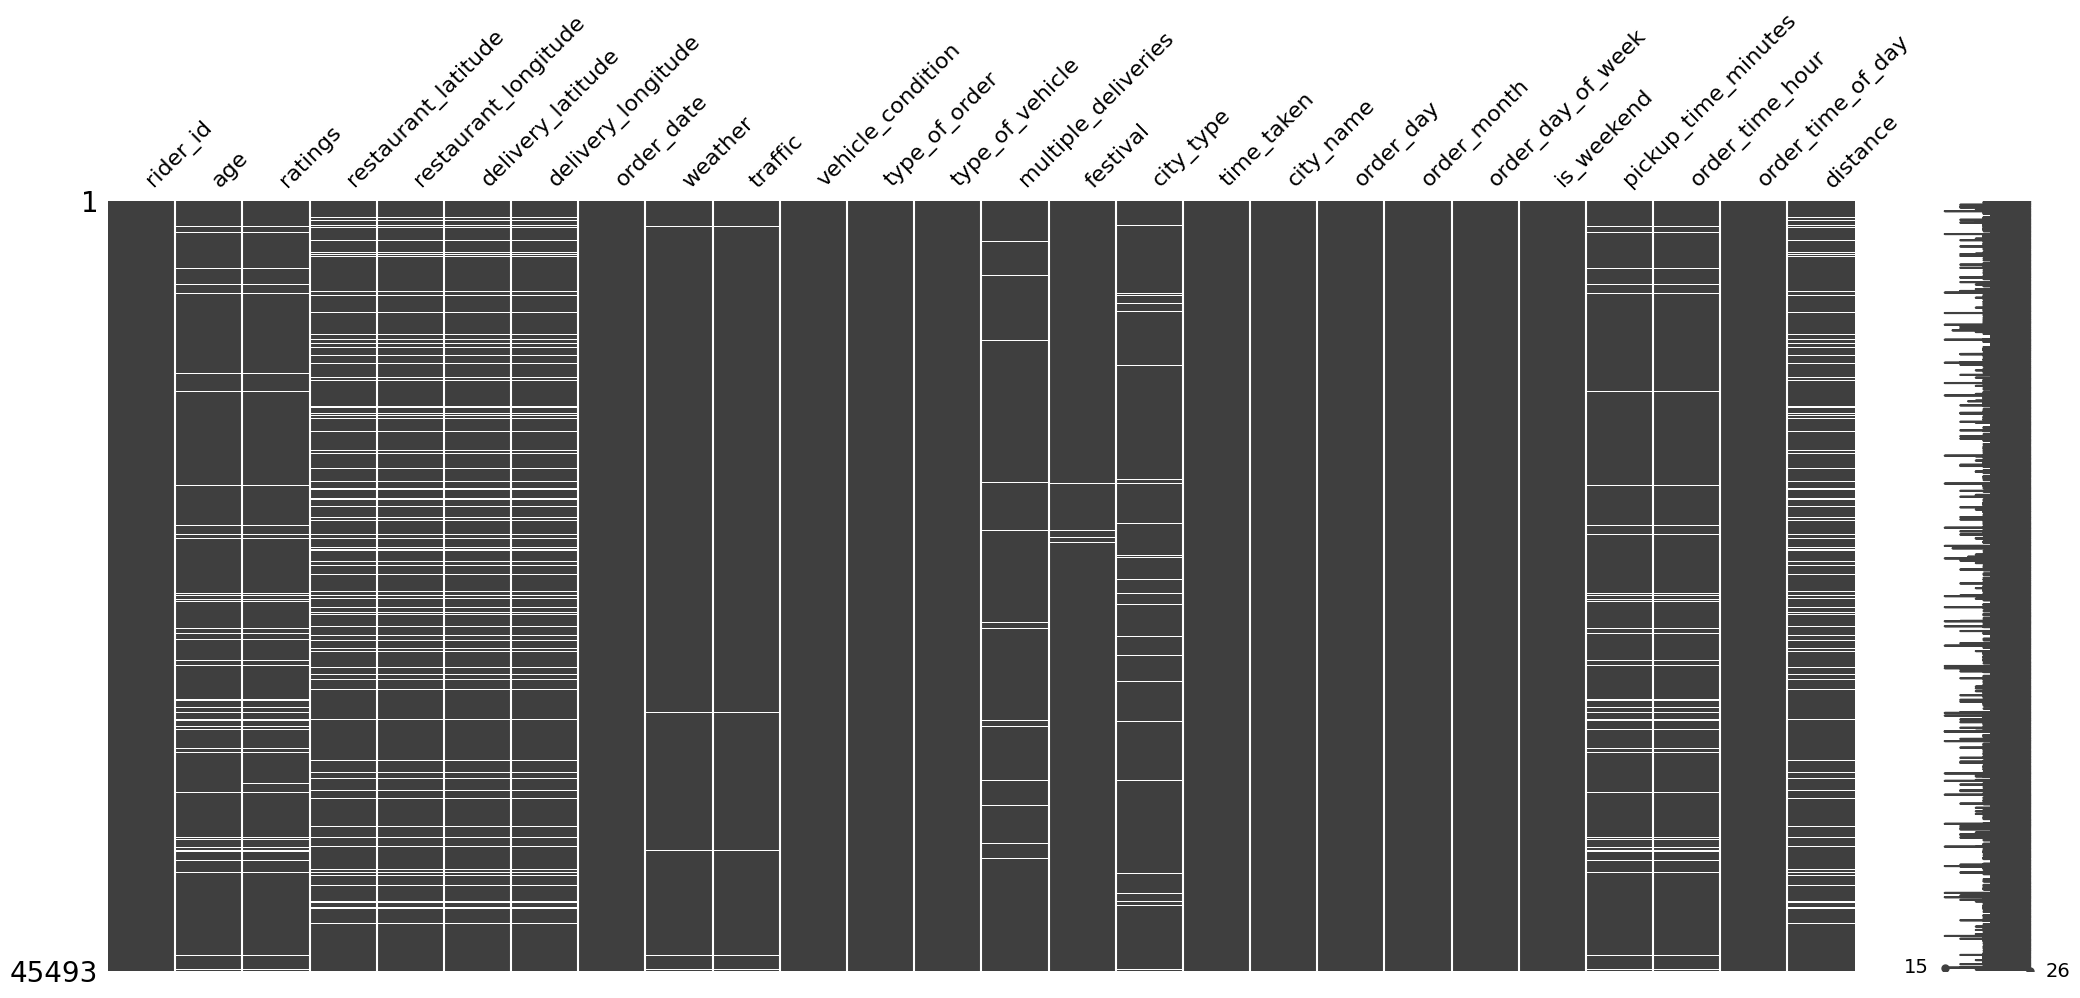

In [ ]:
msno.matrix(df_final)

<Axes: >

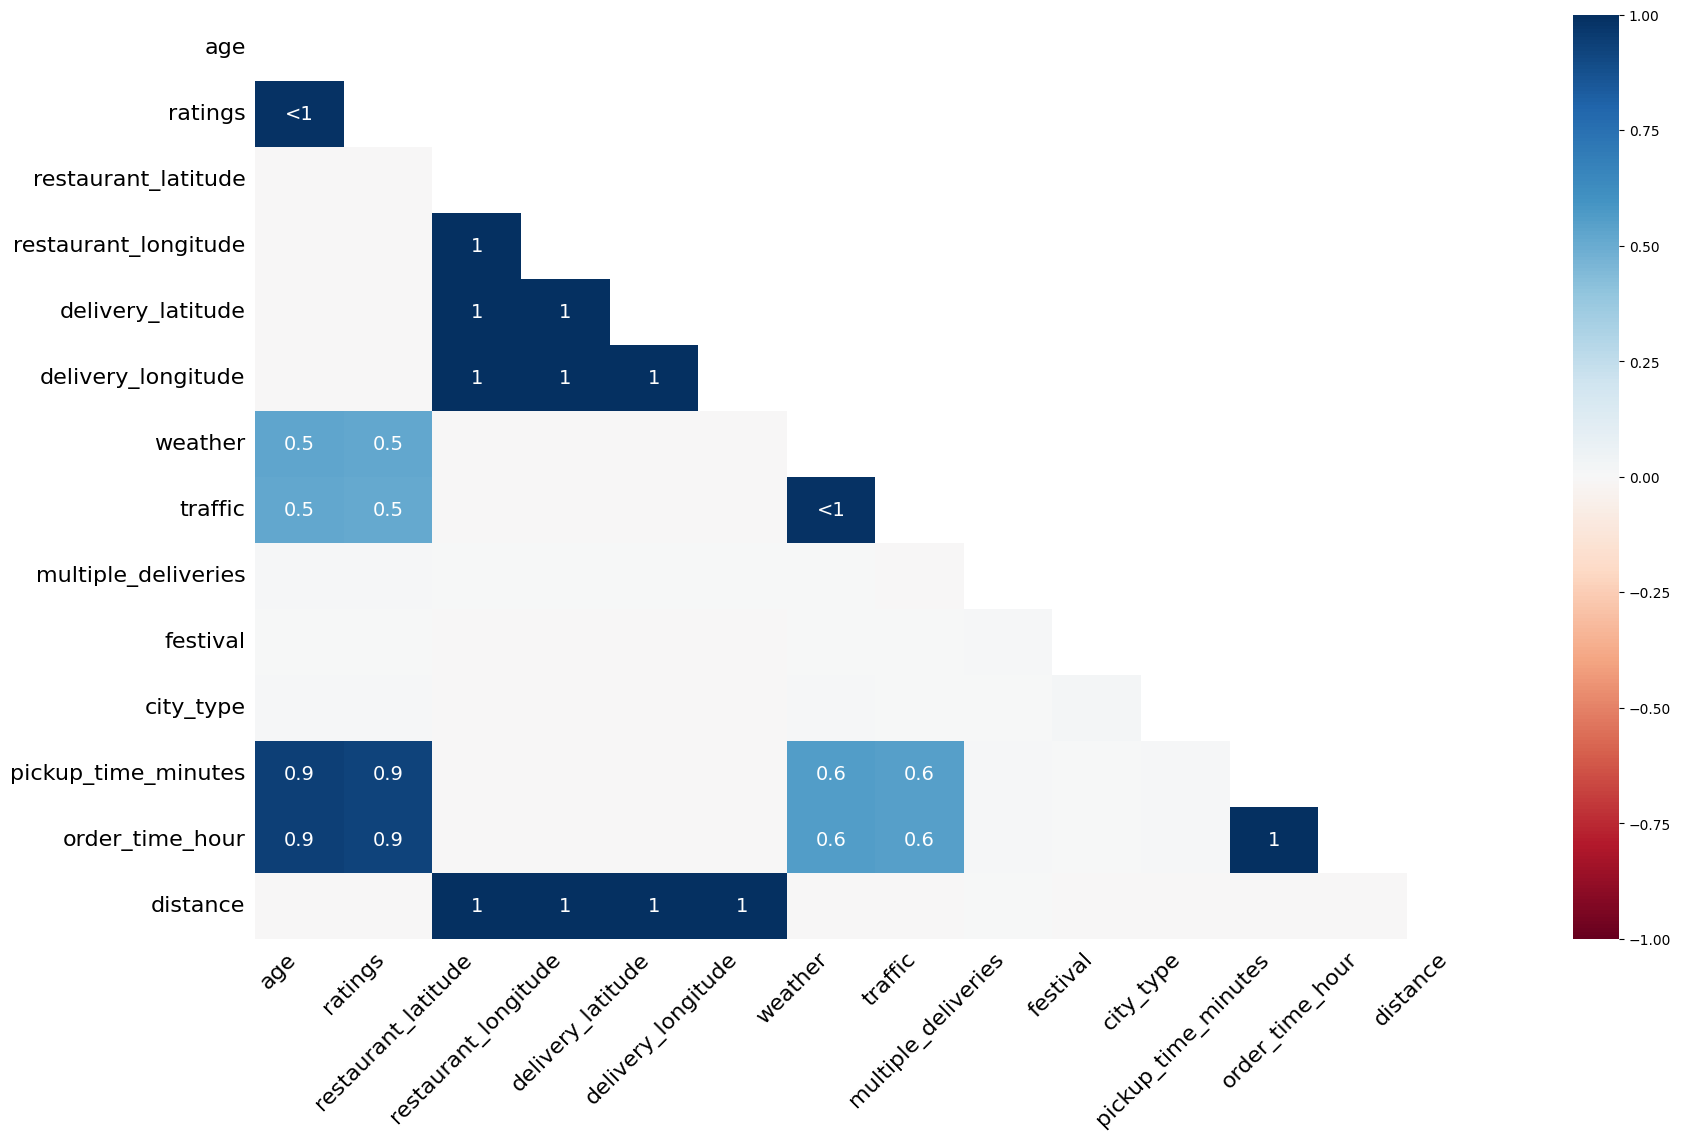

In [ ]:
msno.heatmap(df_final)

<Axes: >

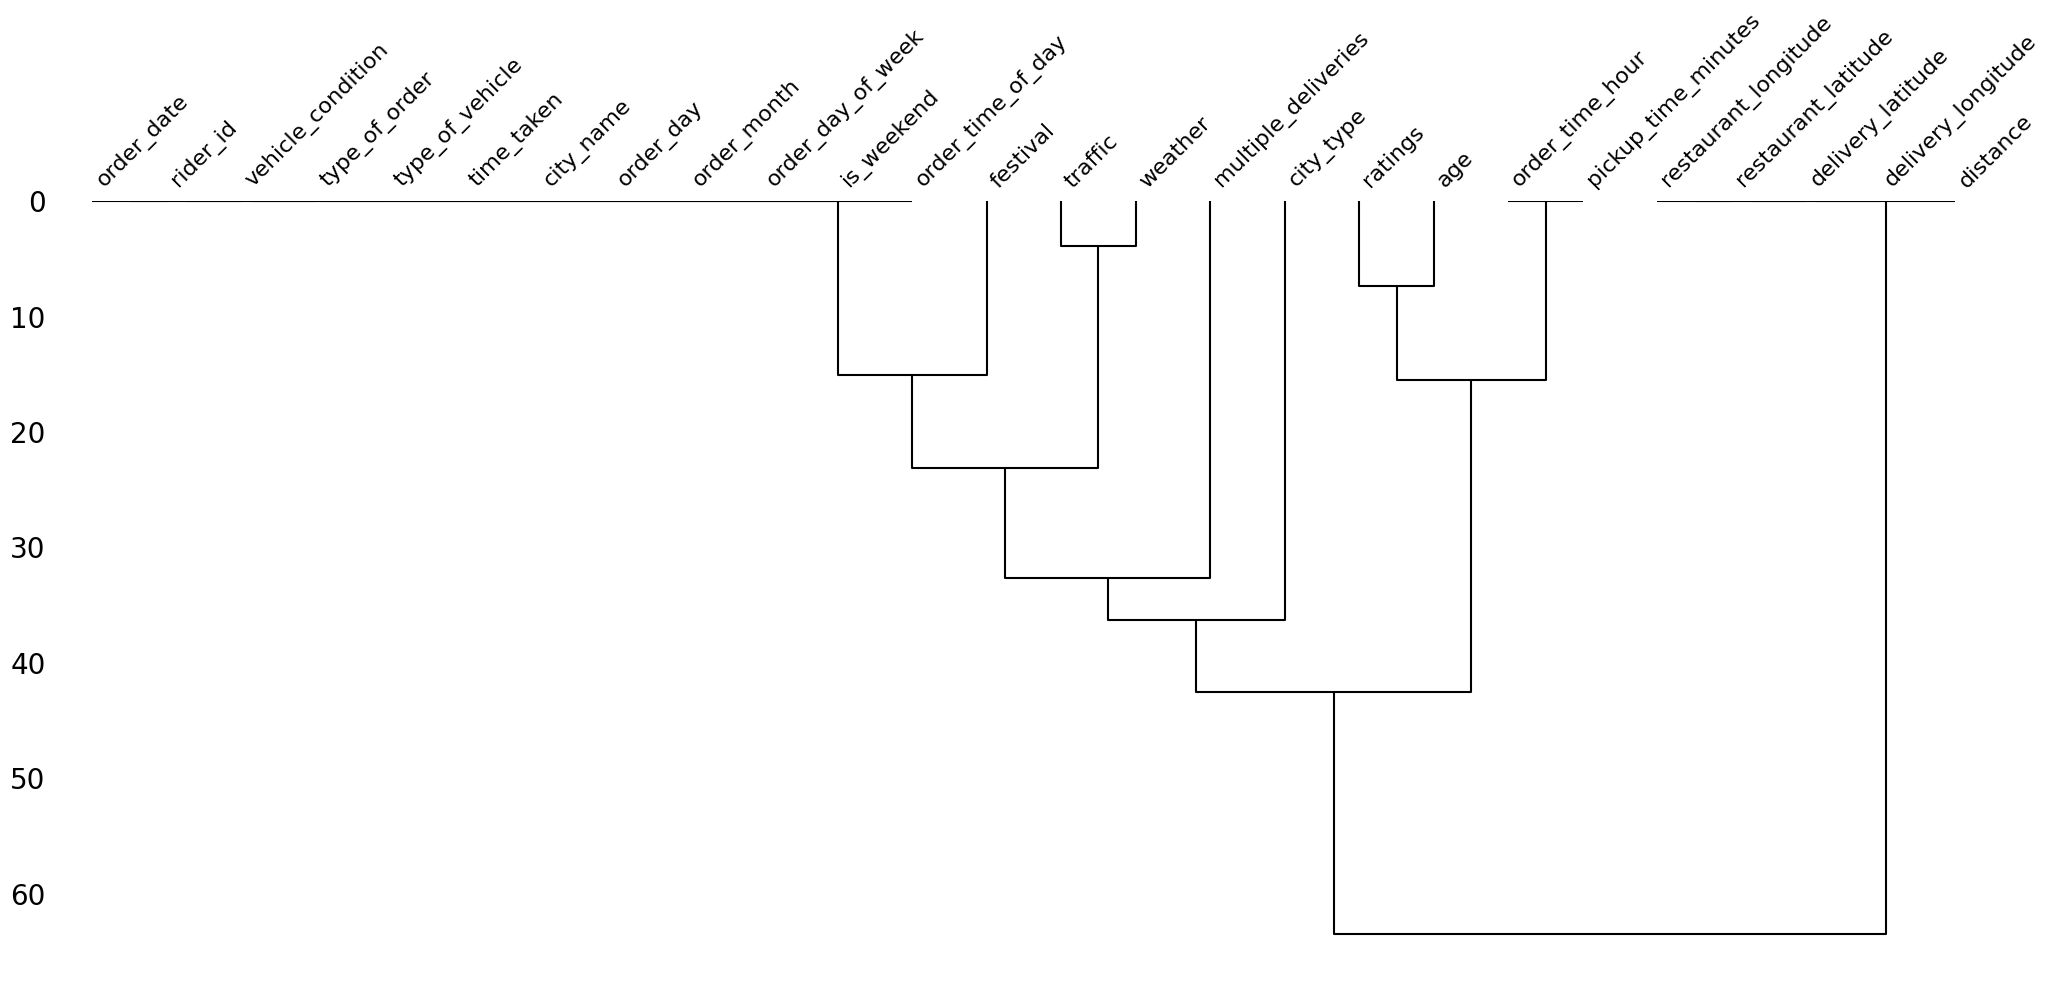

In [ ]:
msno.dendrogram(df_final)

In [ ]:
#univariate
def numerical_analysis(dataframe, column_name, cat_col=None, bins="auto"):
    # create the figure
    fig = plt.figure(figsize=(15,10))
    # generate the layout
    grid = GridSpec(nrows=2, ncols=2, figure=fig)
    # set subplots
    ax1 = fig.add_subplot(grid[0, 0])
    ax2 = fig.add_subplot(grid[0, 1])
    ax3 = fig.add_subplot(grid[1, :])
    # plot the kdeplot
    sns.kdeplot(data=dataframe, x=column_name,hue=cat_col, ax=ax1)
    # plot the boxplot
    sns.boxplot(data=dataframe, x=column_name,hue=cat_col, ax=ax2)
    # plot the histogram
    sns.histplot(data=dataframe, x=column_name,bins=bins,hue=cat_col,kde=True, ax=ax3)
    plt.tight_layout()
    plt.show()

In [ ]:
#bivariate
def numerical_categorical_analysis(dataframe, cat_column_1, num_column):
    fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(15,7.5))
    # plot the barplot
    sns.barplot(data=dataframe, x=cat_column_1, y=num_column, ax=ax1[0])
    # plot the boxplot
    sns.boxplot(data=dataframe, x=cat_column_1, y=num_column, ax=ax1[1])
    # plot violin plot
    sns.violinplot(data=dataframe, x=cat_column_1, y=num_column, ax=ax2[0])
    # plot strip plot
    sns.stripplot(data=dataframe, x=cat_column_1, y=num_column, ax=ax2[1])
    plt.tight_layout()
    plt.show()

In [ ]:
#univariate categorical
def categorical_analysis(dataframe, column_name):
    # print the values counts of categories
    display(
        pd.DataFrame({
            "Count": (
                dataframe[column_name]
                .value_counts()),
            "Percentage": (
                dataframe[column_name]
                .value_counts(normalize=True)
                .mul(100)
                .round(2)
                .astype("str")
                .add("%")
                )
        })
    )
    print("*" * 50)
    # get unique categories
    unique_categories = dataframe[column_name].unique().tolist()
    number_of_categories = dataframe[column_name].nunique()
    print(f"The unique categories in {column_name} column are {unique_categories}")
    print("*" * 50)
    print(f"The number of categories in {column_name} column are {number_of_categories}")
    # plot countplot
    sns.countplot(data=dataframe, x=column_name)
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
#multivariate
def multivariate_analysis(dataframe, num_column, cat_column_1, cat_column_2):
    fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(15,7.5))
    # plot the barplot
    sns.barplot(data=dataframe, x=cat_column_1,
                y=num_column,hue=cat_column_2, ax=ax1[0])
    # plot the boxplot
    sns.boxplot(data=dataframe, x=cat_column_1,
                y=num_column,hue=cat_column_2, gap=0.1, ax=ax1[1])
    # plot violin plot
    sns.violinplot(data=dataframe, x=cat_column_1, gap=0.1,
                   y=num_column,hue=cat_column_2, ax=ax2[0])
    # plot strip plot
    sns.stripplot(data=dataframe, x=cat_column_1,
                  y=num_column,hue=cat_column_2,dodge=True,ax=ax2[1])
    plt.tight_layout()
    plt.show()

In [ ]:
#chi-square categorical
def chi_2_test(dataframe, col1, col2, alpha= 0.05):
    data = (
        dataframe.loc[:, [col1, col2]]
        .dropna()
    )
    # create contingency table
    contingency_table = pd.crosstab(data[col1], data[col2])
    # perform chi-squared test
    _, p_val, _, _ = chi2_contingency(contingency_table)
    print(p_val)
    if p_val <= alpha:
        print(f"Reject the null hypothesis. There is a significant association between {col1} and {col2}.")
    else:
        print(f"Fail to reject the null hypothesis. There is no significant association between {col1} and {col2}.")

In [ ]:
#numerical categorical
def anova_test(dataframe, num_col, cat_col, alpha=0.05):
    data = (
        dataframe.loc[:, [num_col, cat_col]]
        .dropna()
    )
    cat_group = data.groupby(cat_col)
    groups = [group[num_col].values for _, group in cat_group]
    f_stat, p_val = f_oneway(*groups)
    print(p_val)
    if p_val <= alpha:
        print(f"Reject the null hypothesis. There is a significant relationship between {num_col} and {cat_col}.")
    else:
        print(f"Fail to reject the null hypothesis. There is no significant relationship between {num_col} and {cat_col}.")

In [ ]:
#jarguq bera test (because large dataset)
def test_for_normality(dataframe, column_name, alpha=0.05):
    data = dataframe[column_name]
    print("Jarque Bera Test for Normality")
    _, p_val = jarque_bera(data)
    print(p_val)
    if p_val <= alpha:
        print(f"Reject the null hypothesis. The data is not normally distributed.")
    else:
        print(f"Fail to reject the null hypothesis. The data is normally distributed.",end="\n\n")


#Column Wise Analysis

### Time Taken (Target)

In [ ]:
df_final['time_taken'].dtype

dtype('int64')

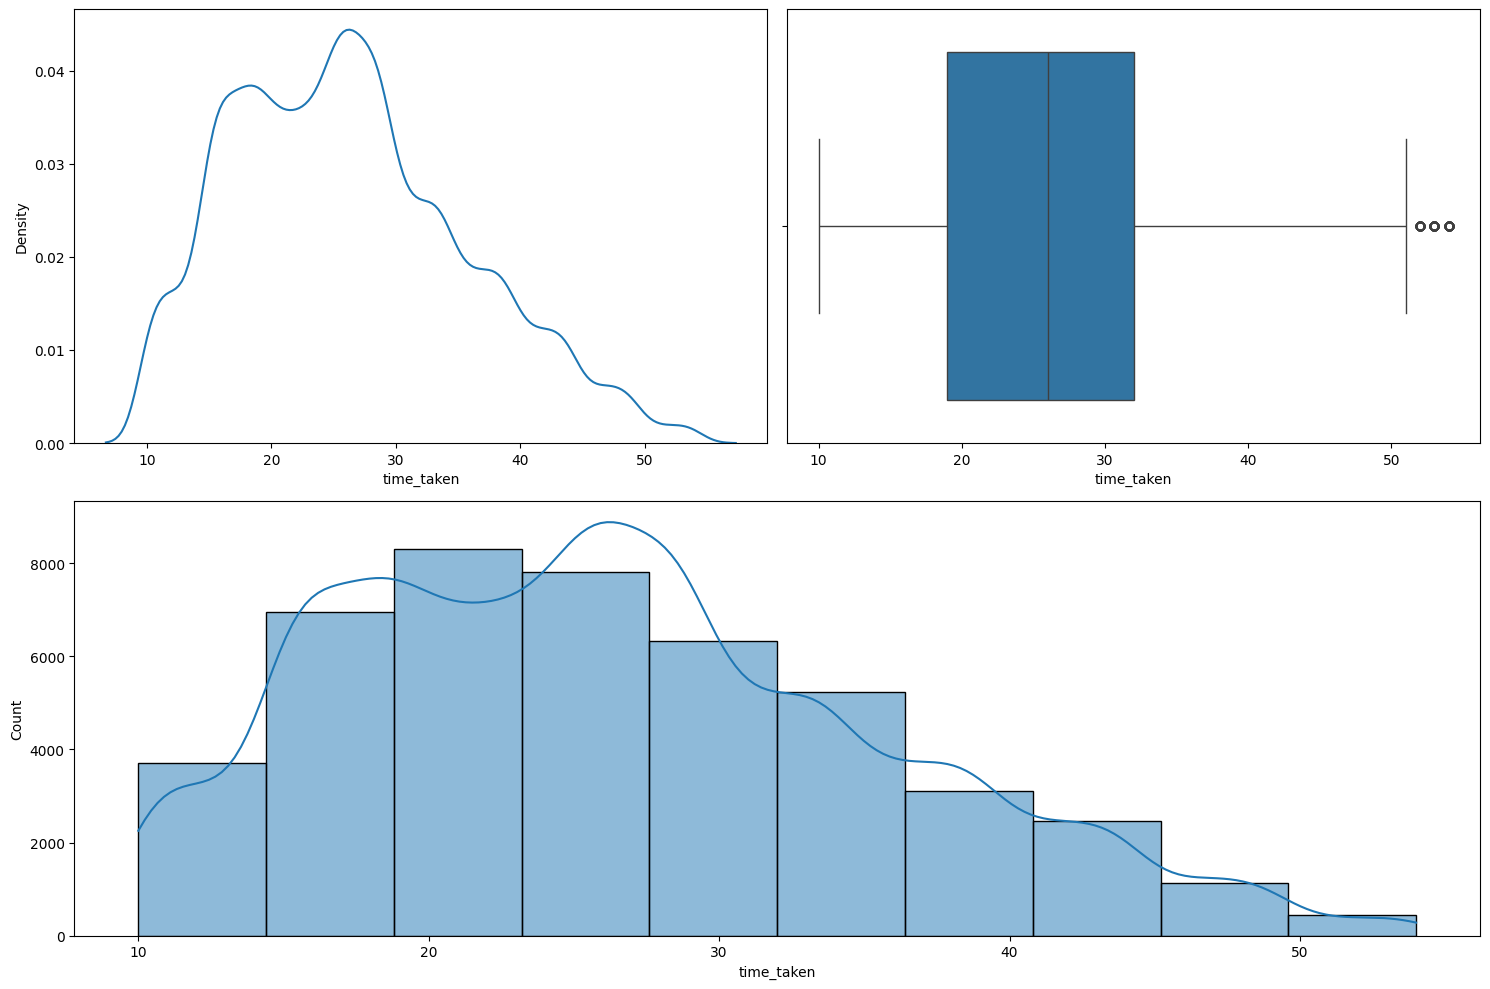

In [ ]:
# numerical analysis

numerical_analysis(df_final, 'time_taken',bins=10)

**Observations:**

1.  The target column is not fully continuous in nature.
2.  The target column shows like bi model distribution with two peaks- One peak around the 17-18 mark and other around 26-27 mark.
3. The target column has some extreme points which can be thought of as outliers but they are just extreme and rare, not outliers. 50 min time is possible for delivery in certain rare cases.



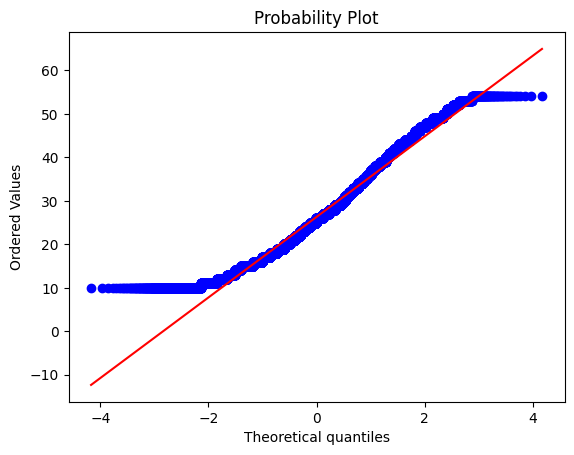

In [ ]:
# plot QQ plot for the target

probplot(df_final['time_taken'], plot=plt)
plt.show()

In [ ]:
# tests for normailty

test_for_normality(df_final, 'time_taken')

Jarque Bera Test for Normality
0.0
Reject the null hypothesis. The data is not normally distributed.


In [ ]:
# check out the rows where data is acting as outlier

target_25_per, target_75_per = np.percentile(df_final['time_taken'], [25, 75])
iqr = target_75_per - target_25_per

upper_bound = target_75_per + (1.5 * iqr)

df_final.loc[(df_final['time_taken'] > upper_bound),"traffic"].value_counts()

traffic
Jam     241
High     24
Name: count, dtype: int64

In [ ]:
df_final.loc[(df_final['time_taken'] > upper_bound),"weather"].value_counts()

weather
Fog           57
Sunny         51
Windy         44
Cloudy        44
Stormy        37
Sandstorms    32
Name: count, dtype: int64

In [ ]:
# average distances
avg_distance = df_final.loc[:,"distance"].mean()
avg_distance_extreme = df_final.loc[(df_final['time_taken'] > upper_bound),"distance"].mean()

print(avg_distance, avg_distance_extreme)

9.718993434996934 13.29215081388658


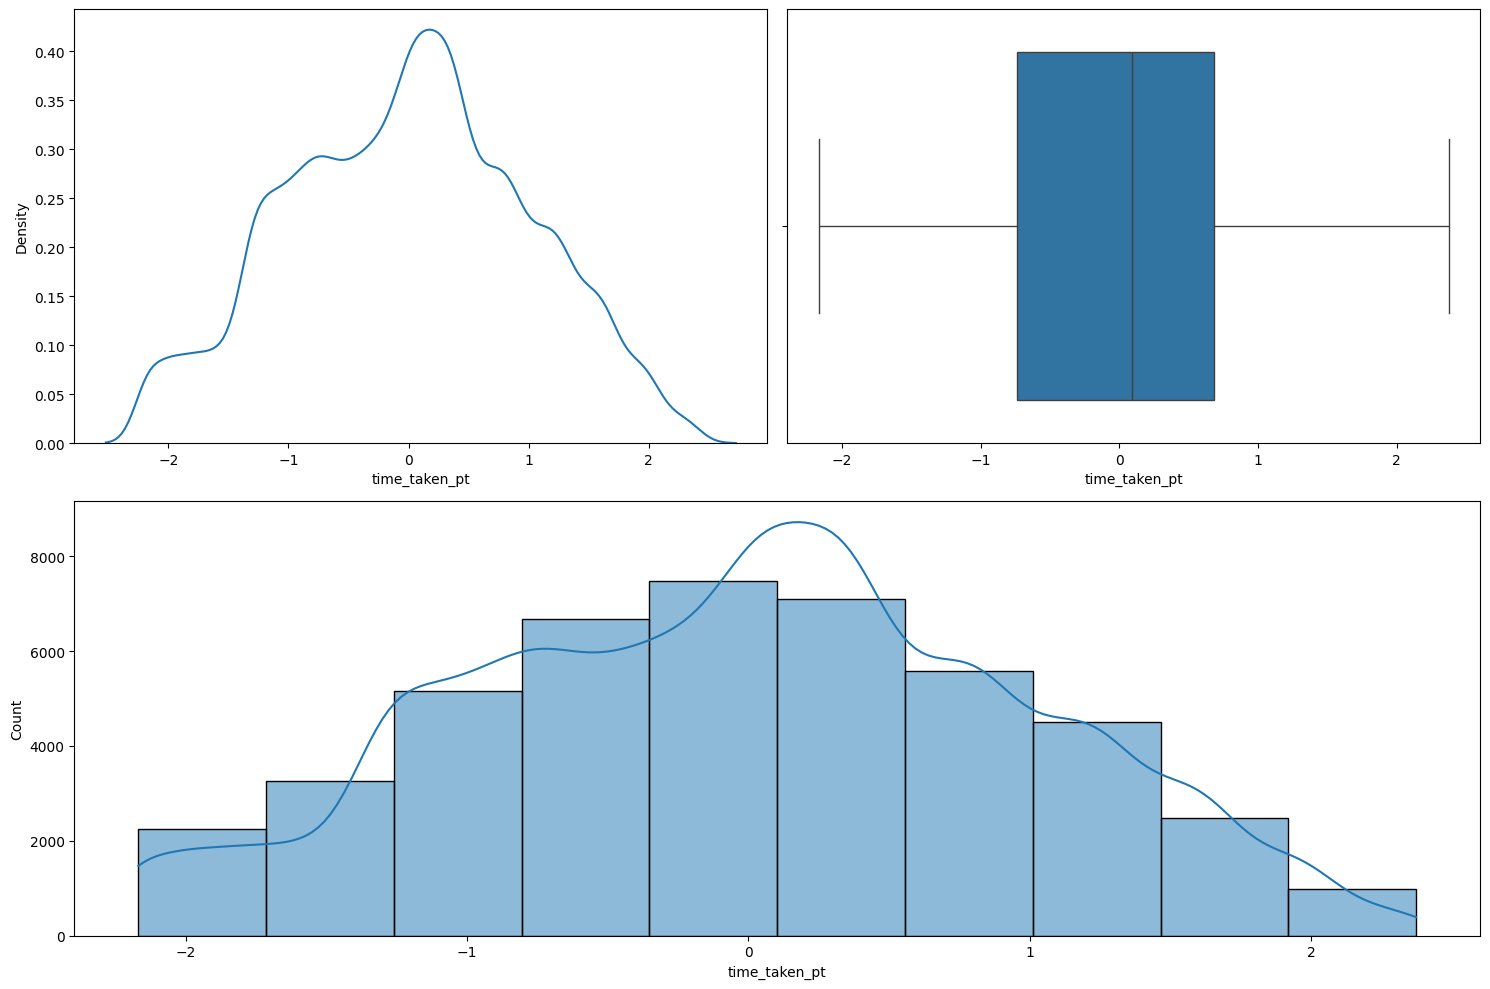

In [ ]:
# fix traget column using transformation

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')

df_final['time_taken_pt'] = pt.fit_transform(df_final[['time_taken']])

numerical_analysis(df_final, "time_taken_pt", bins=10)

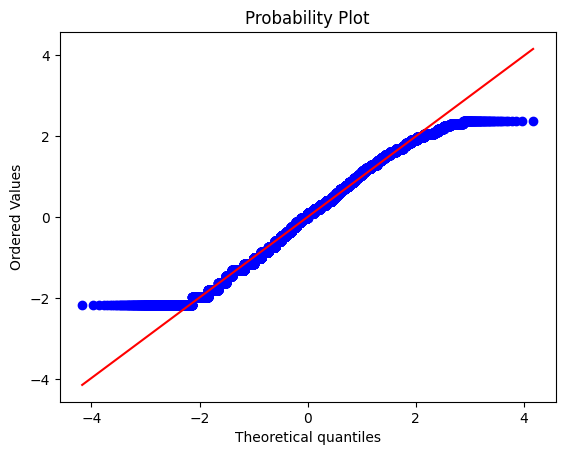

In [ ]:
# plot QQ plot for the target after transformation

probplot(df_final['time_taken_pt'], plot=plt)
plt.show()

### Rider ID

In [ ]:
# datatype of rider id

df_final['rider_id'].dtype

dtype('O')

In [ ]:
df_final[["rider_id","age","ratings"]]

rider_id   age  ratings
0         DEHRES17DEL01  36.0      4.2
1         KOCRES16DEL01  21.0      4.7
2        PUNERES13DEL03  23.0      4.7
3        LUDHRES15DEL02  34.0      4.3
4         KNPRES14DEL02  24.0      4.7
...                 ...   ...      ...
45488     JAPRES04DEL01  30.0      4.8
45489     AGRRES16DEL01  21.0      4.6
45490    CHENRES08DEL03  30.0      4.9
45491   COIMBRES11DEL01  20.0      4.7
45492  RANCHIRES09DEL02  23.0      4.9

[45493 rows x 3 columns]

In [ ]:
# sample of data

rider_id_group = df_final[["rider_id","age","ratings"]].groupby('rider_id')
rider_id_group.head(5).sort_values('rider_id')

rider_id   age  ratings
83     AGRRES010DEL01  34.0      4.7
13214  AGRRES010DEL01  39.0      4.4
12407  AGRRES010DEL01  34.0      4.5
4545   AGRRES010DEL01  38.0      4.7
7729   AGRRES010DEL01  21.0      4.7
...               ...   ...      ...
9744    VADRES20DEL03  38.0      4.8
5137    VADRES20DEL03  37.0      4.9
9783    VADRES20DEL03  30.0      4.6
852     VADRES20DEL03  35.0      4.8
5085    VADRES20DEL03  35.0      4.9

[6600 rows x 3 columns]

In [ ]:
# check for duplicates

df_final[["rider_id","age","ratings"]].dropna().duplicated(keep=False).sum()

np.int64(10150)

In [ ]:
# filter the duplicates

(
    df_final
    .loc[(df_final[["rider_id","age","ratings"]].duplicated(keep=False)),["rider_id","age","ratings"]]
    .dropna()
    .sort_values(["rider_id"])
)

rider_id   age  ratings
40276  AGRRES03DEL02  24.0      4.9
18524  AGRRES03DEL02  24.0      4.9
26266  AGRRES03DEL03  30.0      4.7
28464  AGRRES03DEL03  30.0      4.7
36122  AGRRES06DEL02  36.0      4.9
...              ...   ...      ...
23651  VADRES20DEL02  29.0      4.8
17954  VADRES20DEL03  35.0      4.9
5137   VADRES20DEL03  37.0      4.9
21948  VADRES20DEL03  37.0      4.9
5085   VADRES20DEL03  35.0      4.9

[10150 rows x 3 columns]

**Irrelavant**

In [ ]:
# data type of age column

df_final['age'].dtype

dtype('float64')

In [ ]:
# statistical summary

df_final['age'].describe()

count    43639.000000
mean        29.554779
std          5.761378
min         20.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         39.000000
Name: age, dtype: float64

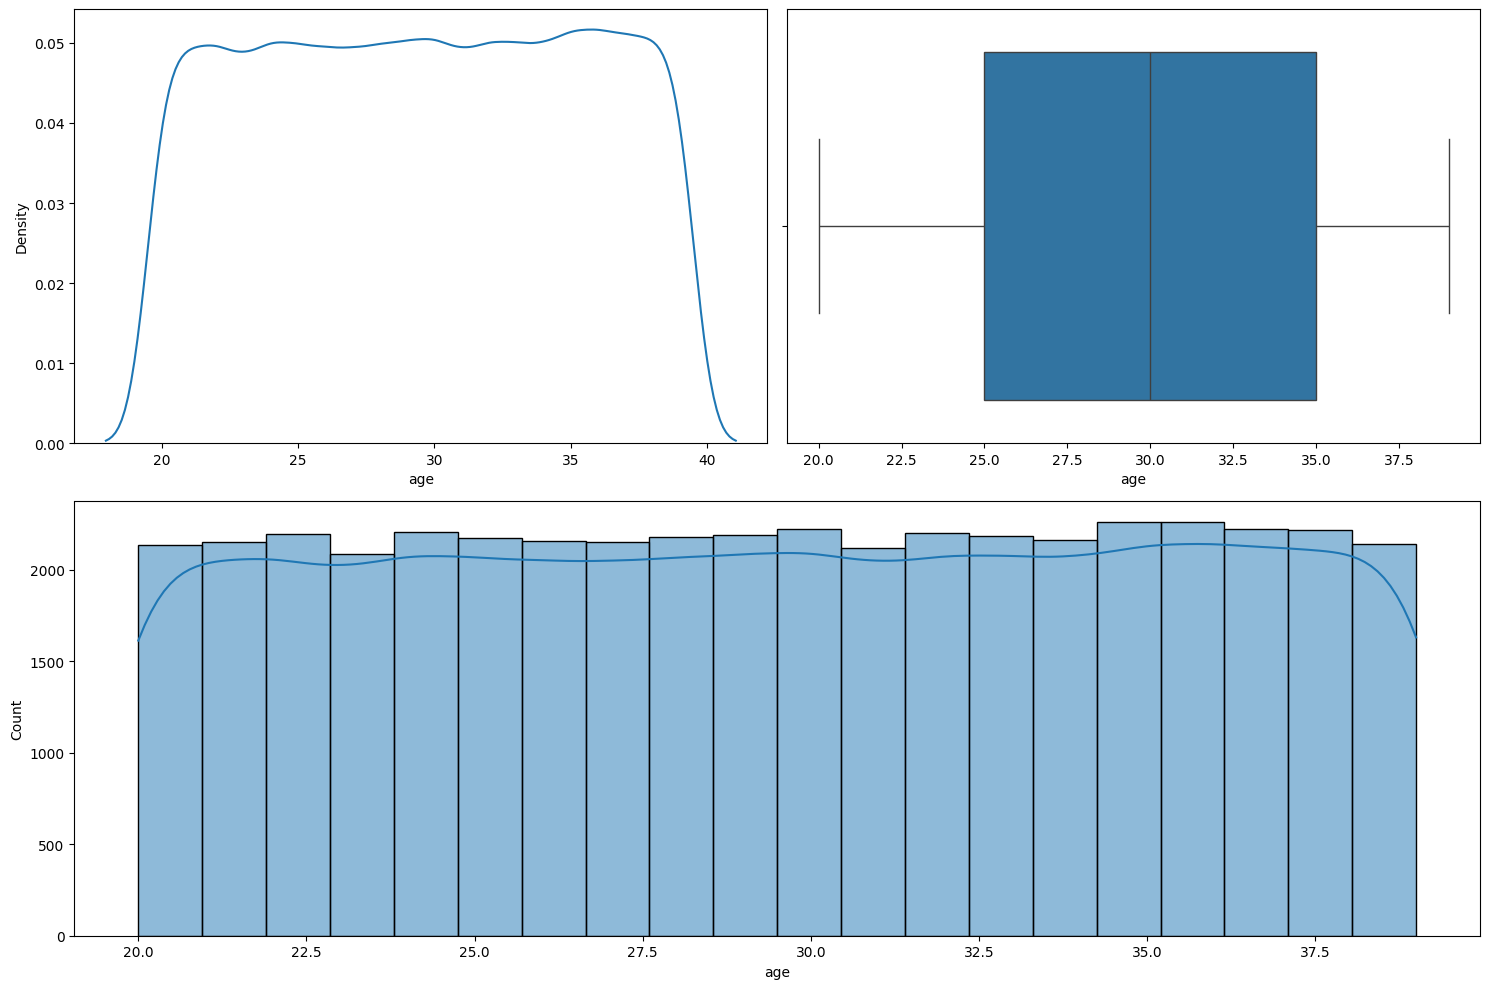

In [ ]:
# numerical analysis for age

numerical_analysis(df_final, 'age',bins=20)

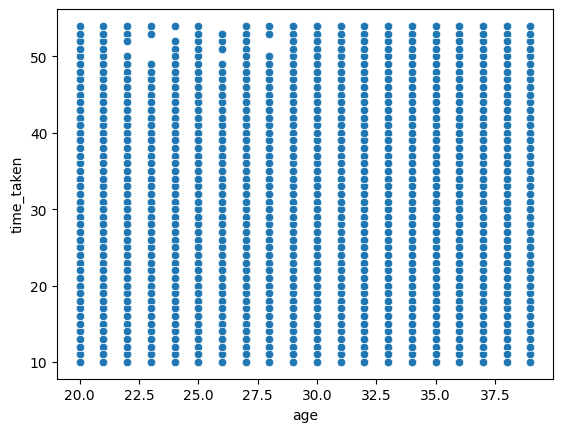

In [ ]:
# relationship between target and age

sns.scatterplot(data=df_final, x='age', y='time_taken')
plt.show()

**Age of the rider does not show any impact on timetaken to deliver**

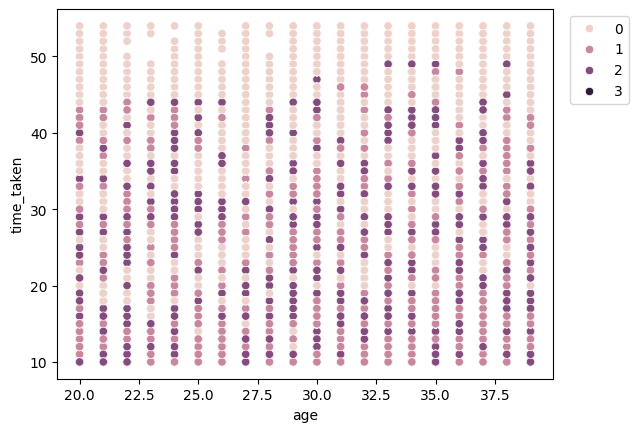

In [ ]:
sns.scatterplot(data=df_final, x='age', y='time_taken', hue="vehicle_condition")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2)
plt.show()

### Observations: Age vs Time Taken with Vehicle Condition as Hue

1. **Age Distribution**  
   - Most delivery partners are in the **20–40 years** range.  
   - This matches the expected working-age group.

2. **Effect of Vehicle Condition**  
   - All vehicle condition levels (0, 1, 2, 3) appear across the full range of delivery times.  
   - Darker shades (condition = 2 or 3) and lighter shades (condition = 0) are **spread evenly**.  
   - This suggests **vehicle condition does not have a strong direct relationship** with delivery time.  

3. **Time Taken Distribution**  
   - Majority of deliveries fall between **10 and 40 minutes**.  
   - Beyond 40 minutes, deliveries become more scattered, but all vehicle conditions are still present.  

4. **No Clear Separation**  
   - Heavy overlap of colors shows that vehicle condition alone is **not a strong predictor** of delivery time.  
   - It may still be useful in combination with other features like **traffic, distance, weather, or order size**.

---

✅ **EDA Insight**:  
- Vehicle condition alone doesn’t strongly explain variation in `time_taken`.  
- It’s worth exploring **interactions** (e.g., does poor vehicle condition matter more for older riders or for longer distances?).  


<Axes: xlabel='type_of_vehicle', ylabel='age'>

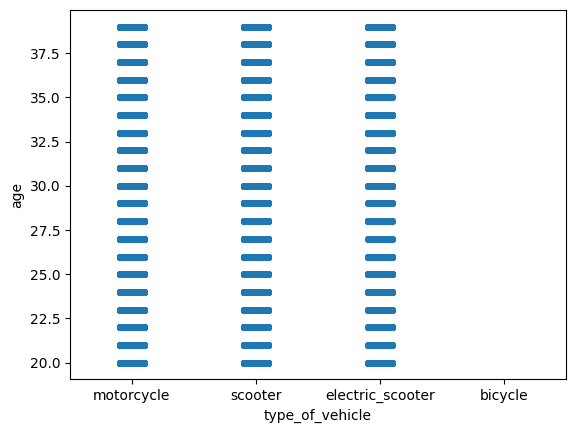

In [ ]:
# preferences of vehicle type based on age

sns.stripplot(df_final,x='type_of_vehicle',y='age')

### Ratings

In [ ]:
df_final['ratings'].dtype

dtype('float64')

In [ ]:
# statistical summary

df_final['ratings'].describe()

count    43585.000000
mean         4.635280
std          0.313851
min          2.500000
25%          4.500000
50%          4.700000
75%          4.900000
max          5.000000
Name: ratings, dtype: float64

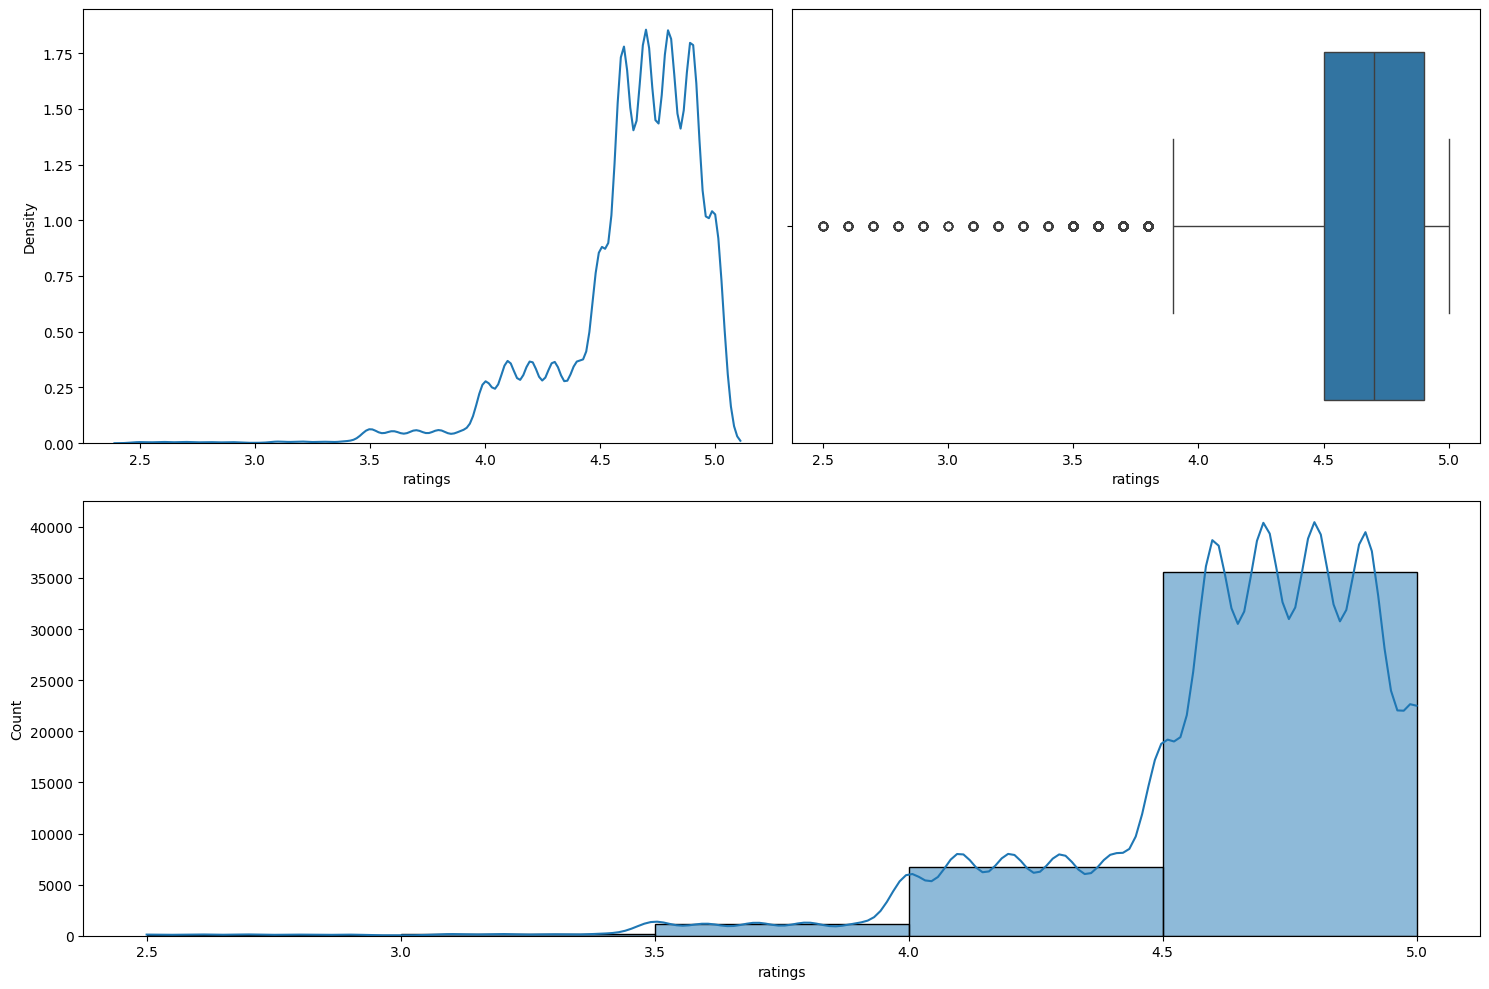

In [ ]:
# numerical analysis

numerical_analysis(df_final, 'ratings',bins=5)

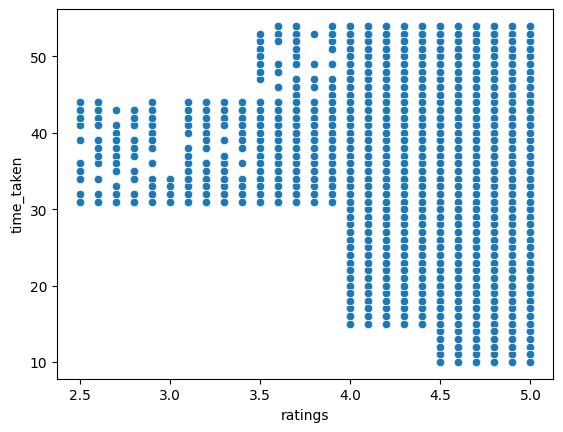

In [ ]:
# does ratings affect delivery time

sns.scatterplot(data=df_final, x='ratings', y='time_taken')
plt.show()


### Observations: Ratings vs Time Taken

1. **Low Ratings (2.5 – 3.5)**  
   - Concentrated mostly in **higher delivery times (30–50 mins)**.  
   - Very few fast deliveries with low ratings.  
   - Suggests that **slower deliveries tend to get poorer ratings**.  

2. **Mid Ratings (~4.0)**  
   - Wide spread between **20 to 50+ mins**.  
   - Ratings of 4.0 come from both quick and slower deliveries.  

3. **High Ratings (4.5 – 5.0)**  
   - Mostly fall in the **10–40 mins range**, especially below 30 mins.  
   - Faster deliveries are more likely to get **excellent ratings**.  

4. **Trend**  
   - Clear **negative relationship**:  
     - Lower `time_taken` ⟶ Higher ratings.  
     - Higher `time_taken` ⟶ Lower ratings.  

---

**EDA Insight**:  
- Delivery speed (`time_taken`) has a **direct influence** on customer satisfaction (`ratings`).  
- Faster deliveries consistently correlate with better ratings, unlike vehicle condition which showed weak influence.



**It seems like riders with more ratings get more orders**

**Higher ratings equates to more work and more income opportunities**

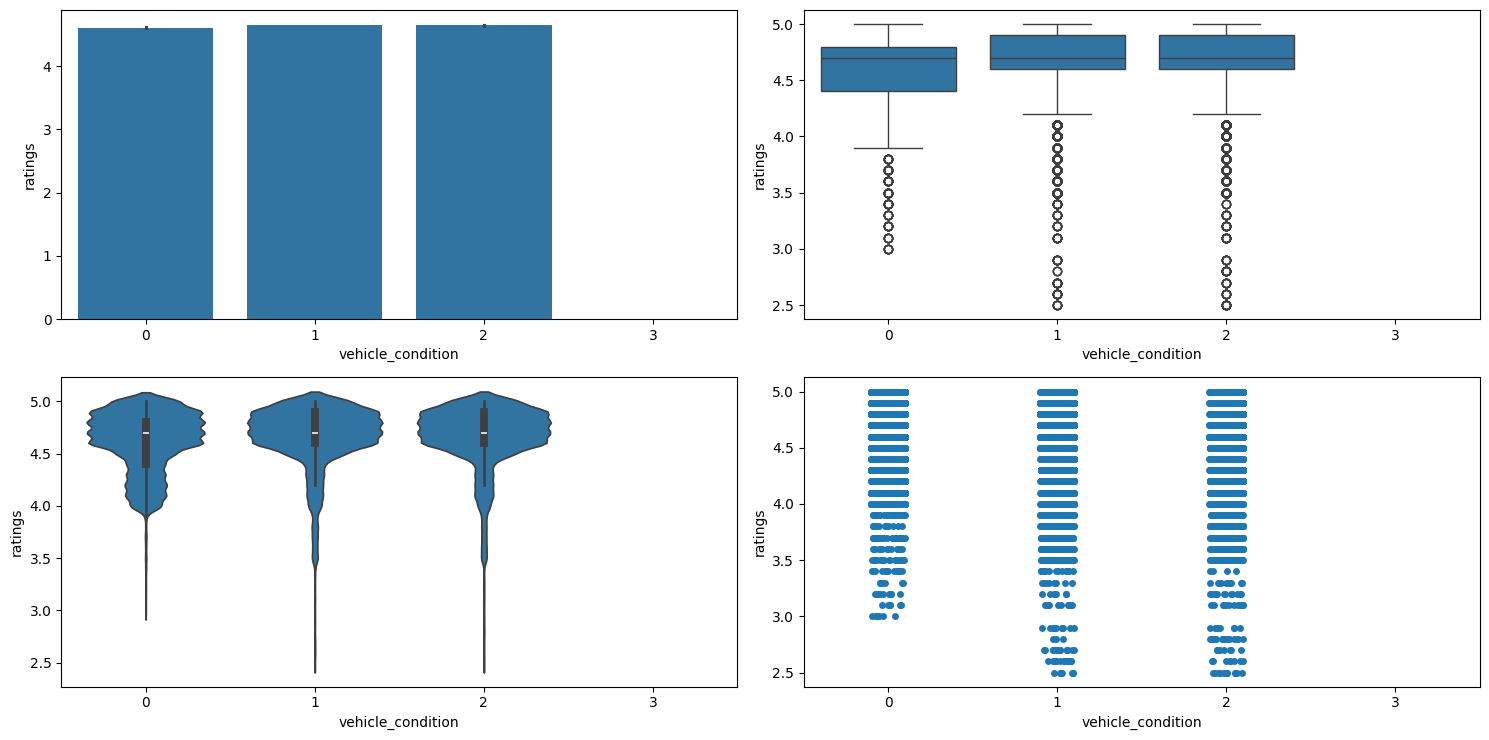

In [ ]:
# does ratings get affected by vehicle type

numerical_categorical_analysis(df_final, 'vehicle_condition', 'ratings')


**Yes they do**

1.   The more worst the vehicle condition is, the more lower the rating gets.
2.   The category 3 has no data means there are NaN values
3.   Maybe Customers avoid rating their riders even rating of 1 when the vehicle condition is bad.



In [ ]:
(
    df_final[["ratings","vehicle_condition"]]
    .loc[df_final["vehicle_condition"]==3,"ratings"]
    .value_counts(dropna=False)
)

ratings
NaN    429
Name: count, dtype: int64

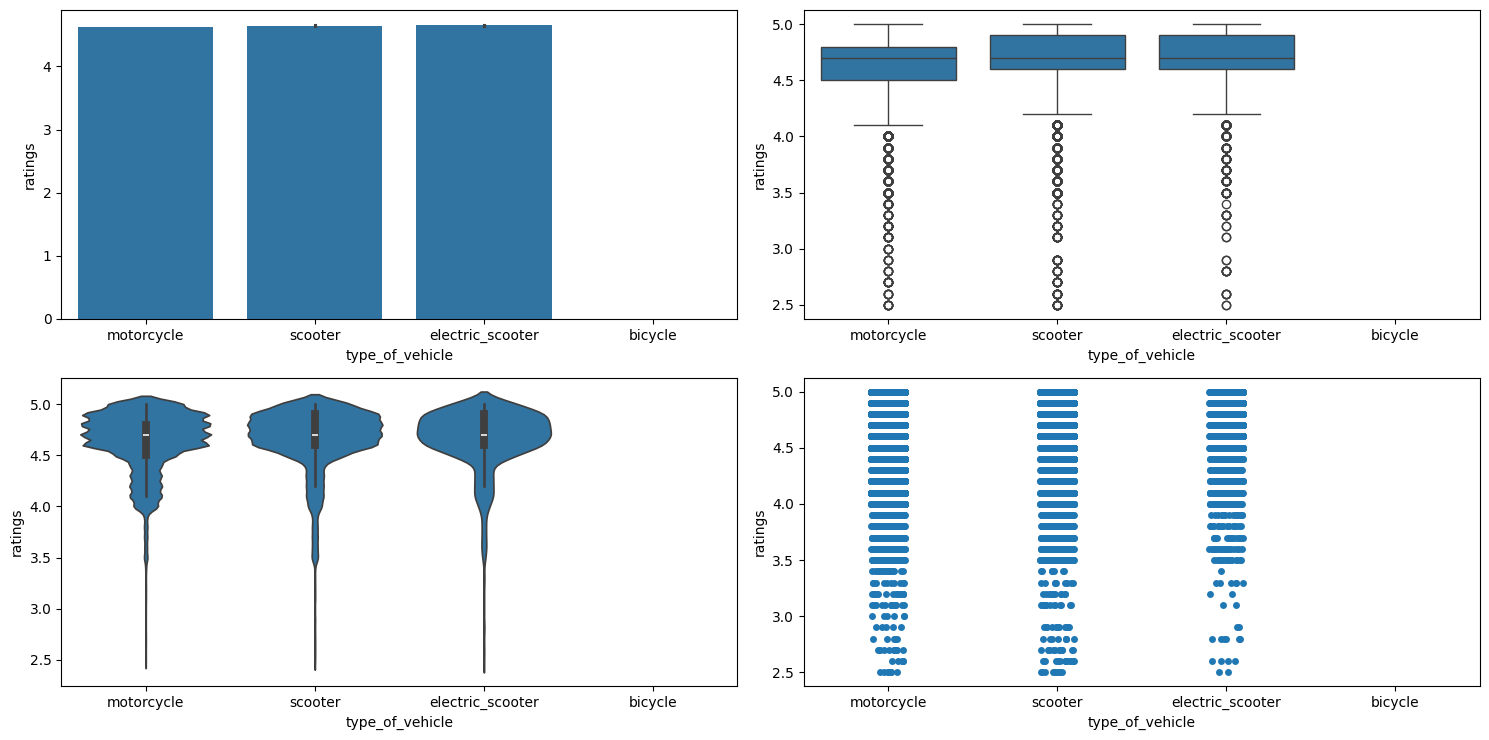

In [ ]:
# does type of vehicle affects ratings

numerical_categorical_analysis(df_final, 'type_of_vehicle', 'ratings')

By looking at bar chart we can see that all the vechicle have kind of similar rating but when we look at strip plot we can see that electric scooter have more preferences on delivery and on average have more rating maybe app is showing green delivery.

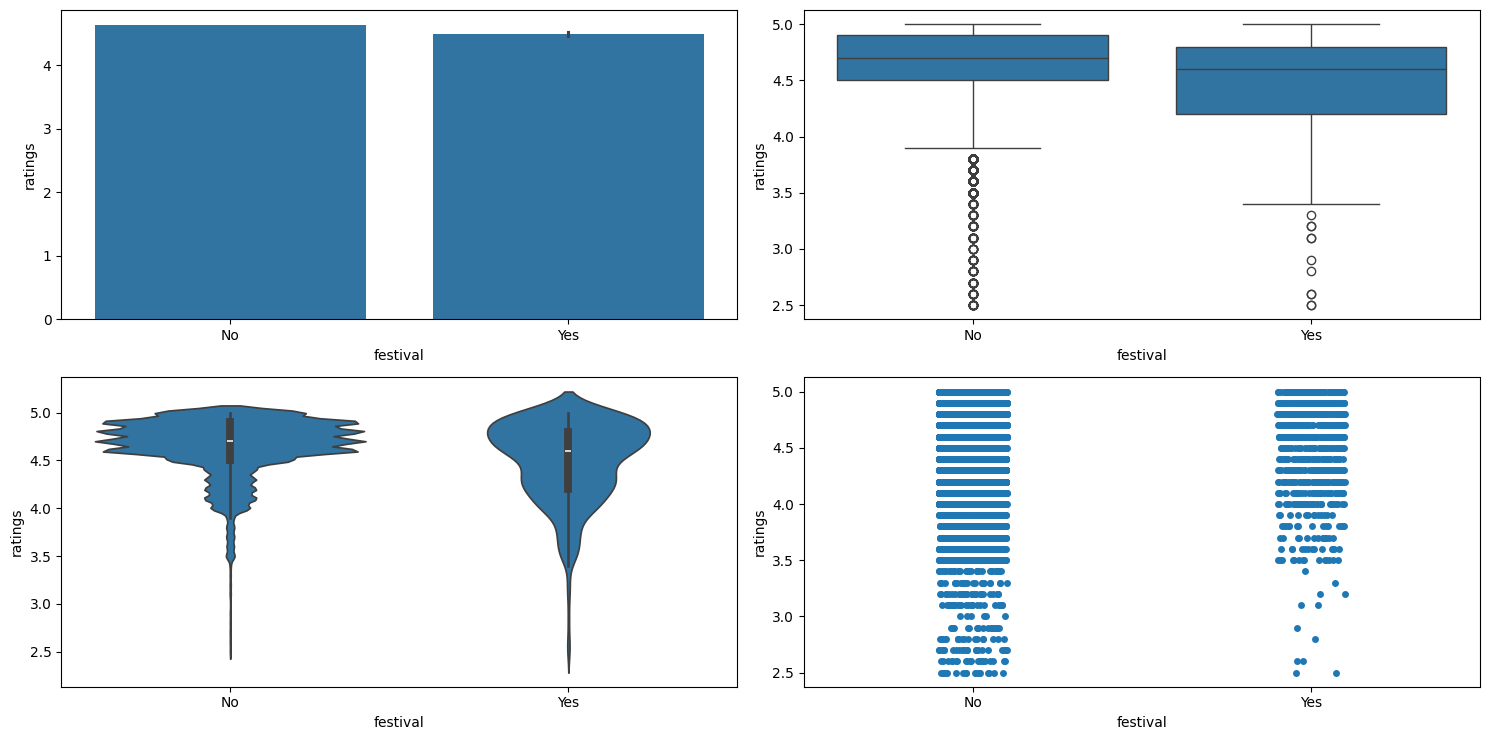

In [ ]:
# festivals and rider ratings

numerical_categorical_analysis(df_final, 'festival', 'ratings')

### Observations: Ratings During Festivals

- From the violin chart, we can see that **ratings are lower during festivals** compared to non-festival days.  
- A possible reason is that **delivery times increase during festivals** due to high demand and traffic.  
- As a result, **customer satisfaction (ratings) decreases** during festivals.  

**EDA Insight**:  
Maybe Festivals negatively impact ratings but not sure, likely because of longer delivery times. This suggests that managing delivery efficiency during peak festival periods is crucial for maintaining customer satisfaction.  


In [ ]:
df_final.columns[3:7].tolist() + ["city_name"]

['restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude',
 'city_name']

In [ ]:
# location subset

location_subset = df_final.loc[:,df_final.columns[3:7].tolist() + ["city_name"]]

location_subset

restaurant_latitude  restaurant_longitude  delivery_latitude  \
0                30.327968             78.046106          30.397968   
1                10.003064             76.307589          10.043064   
2                18.562450             73.916619          18.652450   
3                30.899584             75.809346          30.919584   
4                26.463504             80.372929          26.593504   
...                    ...                   ...                ...   
45488            26.902328             75.794257          26.912328   
45489                  NaN                   NaN                NaN   
45490            13.022394             80.242439          13.052394   
45491            11.001753             76.986241          11.041753   
45492            23.351058             85.325731          23.431058   

       delivery_longitude city_name  
0               78.116106       DEH  
1               76.347589       KOC  
2               74.006619      PUNE  
3               75.829346      LUDH  
4               80.502929       KNP  
...                   ...       ...  
45488           75.804257       JAP  
45489                 NaN       AGR  
45490           80.272439      CHEN  
45491           77.026241     COIMB  
45492           85.405731    RANCHI  

[45493 rows x 5 columns]

In [ ]:
location_subset.dropna(inplace=True)

location_subset

restaurant_latitude  restaurant_longitude  delivery_latitude  \
0                30.327968             78.046106          30.397968   
1                10.003064             76.307589          10.043064   
2                18.562450             73.916619          18.652450   
3                30.899584             75.809346          30.919584   
4                26.463504             80.372929          26.593504   
...                    ...                   ...                ...   
45487            23.371292             85.327872          23.481292   
45488            26.902328             75.794257          26.912328   
45490            13.022394             80.242439          13.052394   
45491            11.001753             76.986241          11.041753   
45492            23.351058             85.325731          23.431058   

       delivery_longitude city_name  
0               78.116106       DEH  
1               76.347589       KOC  
2               74.006619      PUNE  
3               75.829346      LUDH  
4               80.502929       KNP  
...                   ...       ...  
45487           85.437872    RANCHI  
45488           75.804257       JAP  
45490           80.272439      CHEN  
45491           77.026241     COIMB  
45492           85.405731    RANCHI  

[41863 rows x 5 columns]

In [ ]:
# plot deliveries on map

delivery_df = pd.DataFrame({
    'latitude': location_subset['delivery_latitude'],
    'longitude': location_subset['delivery_longitude'],
    "city_name": location_subset["city_name"]
})


# Create a map using Plotly's scatter_mapbox
fig = px.scatter_mapbox(
    delivery_df,
    lat='latitude',
    lon='longitude',
    title="Delivery Points",
    hover_name="city_name"
)

# Update the layout for the map of India
fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_center={"lat": 20.5937, "lon": 78.9629},  # Centered over India
    mapbox_zoom=3,
)

# Show the plot
fig.show()

In [ ]:
df_final.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance'],
      dtype='object')

In [ ]:
df_final.filter(like="order")

order_date type_of_order  order_day  order_month order_day_of_week  \
0      2022-02-12         Snack         12            2          saturday   
1      2022-02-13          Meal         13            2            sunday   
2      2022-03-04        Drinks          4            3            friday   
3      2022-02-13        Buffet         13            2            sunday   
4      2022-02-14         Snack         14            2            monday   
...           ...           ...        ...          ...               ...   
45488  2022-03-24          Meal         24            3          thursday   
45489  2022-02-16        Buffet         16            2         wednesday   
45490  2022-03-11        Drinks         11            3            friday   
45491  2022-03-07         Snack          7            3            monday   
45492  2022-03-02         Snack          2            3         wednesday   

       order_time_hour order_time_of_day  
0                 21.0             night  
1                 14.0         afternoon  
2                 17.0           evening  
3                  9.0           morning  
4                 19.0           evening  
...                ...               ...  
45488             11.0           morning  
45489             19.0           evening  
45490             23.0             night  
45491             13.0         afternoon  
45492             17.0           evening  

[45493 rows x 7 columns]

In [ ]:
order_date_subset = df_final.loc[:,["order_date","order_day","order_month","order_day_of_week","is_weekend","festival"]]

order_date_subset

order_date  order_day  order_month order_day_of_week  is_weekend  \
0      2022-02-12         12            2          saturday           1   
1      2022-02-13         13            2            sunday           1   
2      2022-03-04          4            3            friday           0   
3      2022-02-13         13            2            sunday           1   
4      2022-02-14         14            2            monday           0   
...           ...        ...          ...               ...         ...   
45488  2022-03-24         24            3          thursday           0   
45489  2022-02-16         16            2         wednesday           0   
45490  2022-03-11         11            3            friday           0   
45491  2022-03-07          7            3            monday           0   
45492  2022-03-02          2            3         wednesday           0   

      festival  
0           No  
1           No  
2           No  
3           No  
4           No  
...        ...  
45488       No  
45489       No  
45490       No  
45491       No  
45492       No  

[45493 rows x 6 columns]

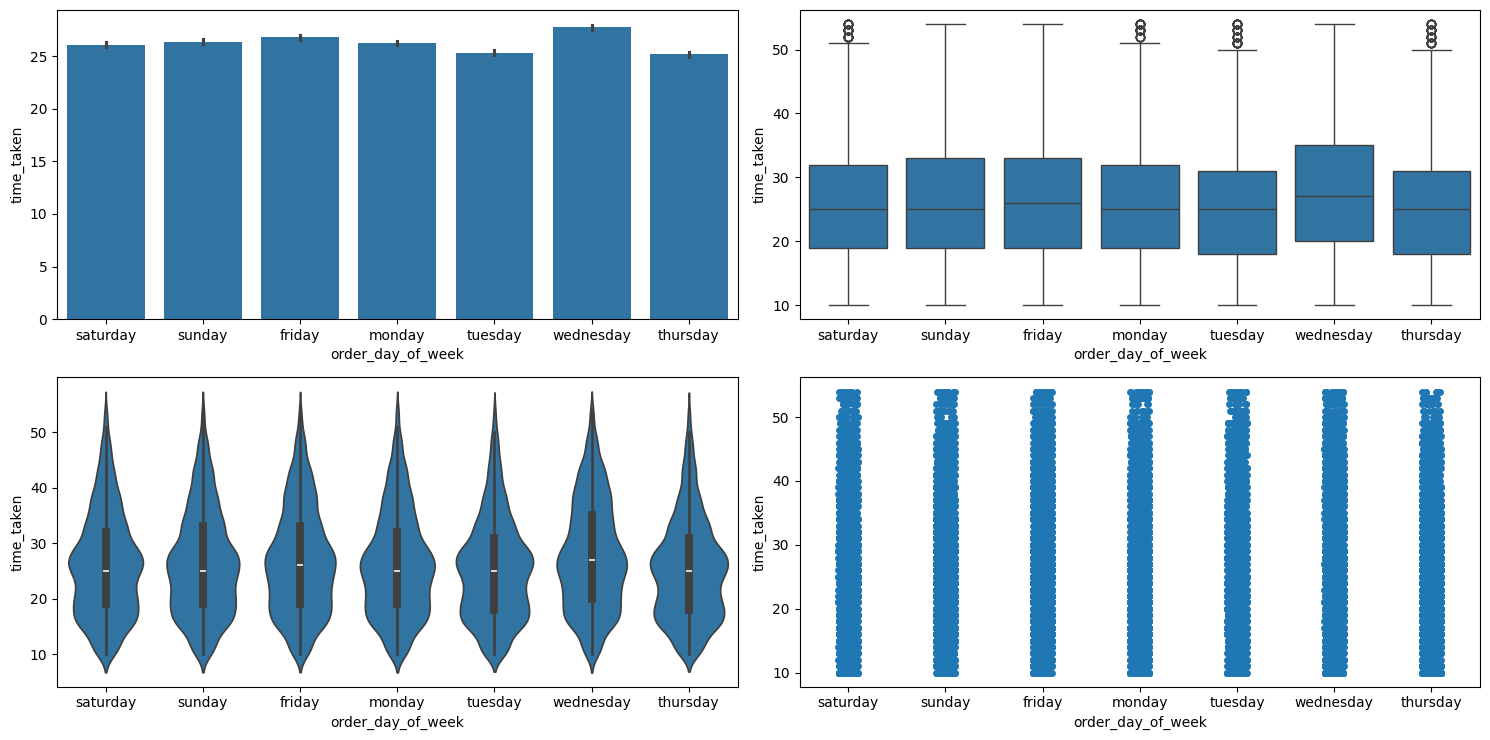

In [ ]:
# analysis between day of week and target

numerical_categorical_analysis(df_final, "order_day_of_week", "time_taken")

No effect of time taken for day of the week

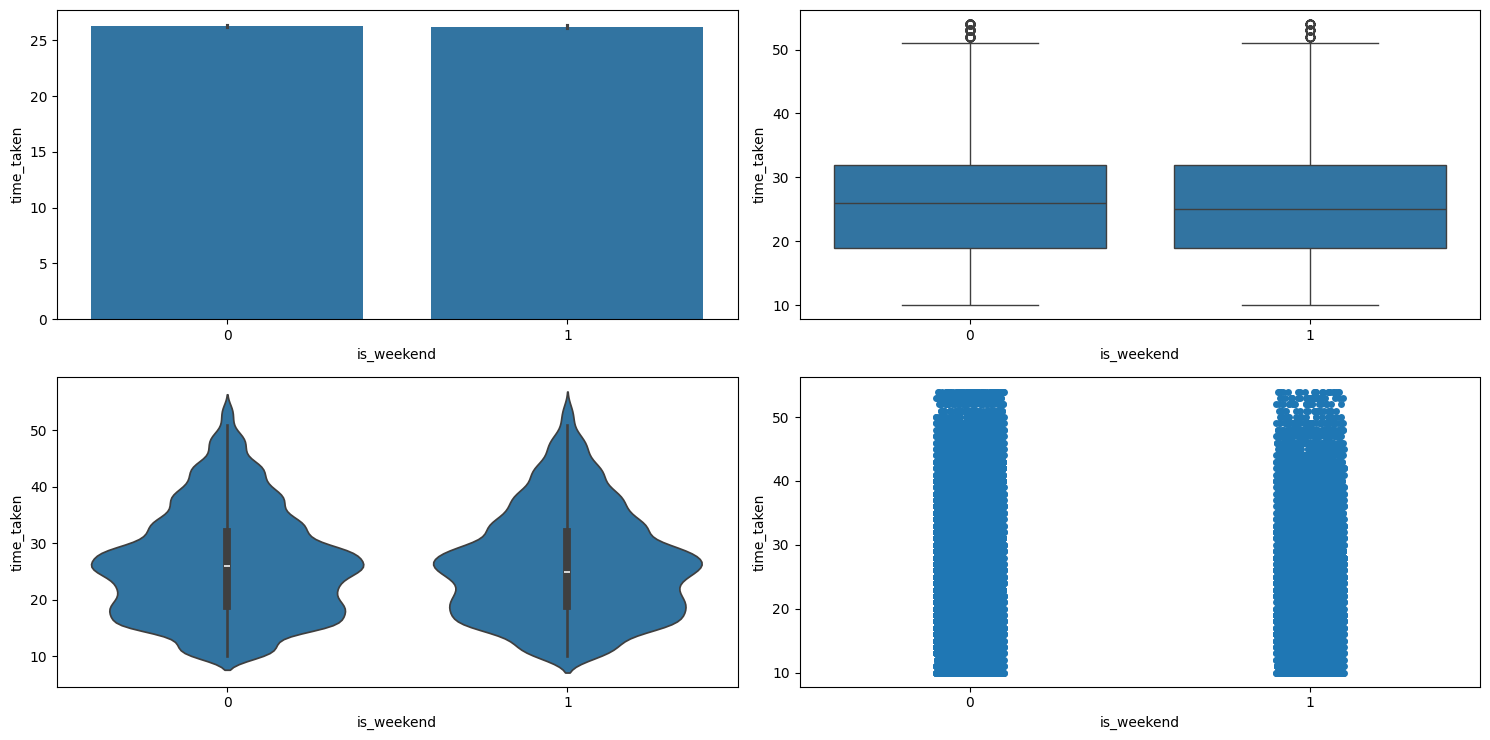

In [ ]:
# does having a weekend affects target

numerical_categorical_analysis(df_final, "is_weekend", "time_taken")

No effect of time taken

In [ ]:
# do weekends have an impact on traffic

chi_2_test(df_final, "is_weekend", "traffic")

0.6665397125915671
Fail to reject the null hypothesis. There is no significant association between is_weekend and traffic.


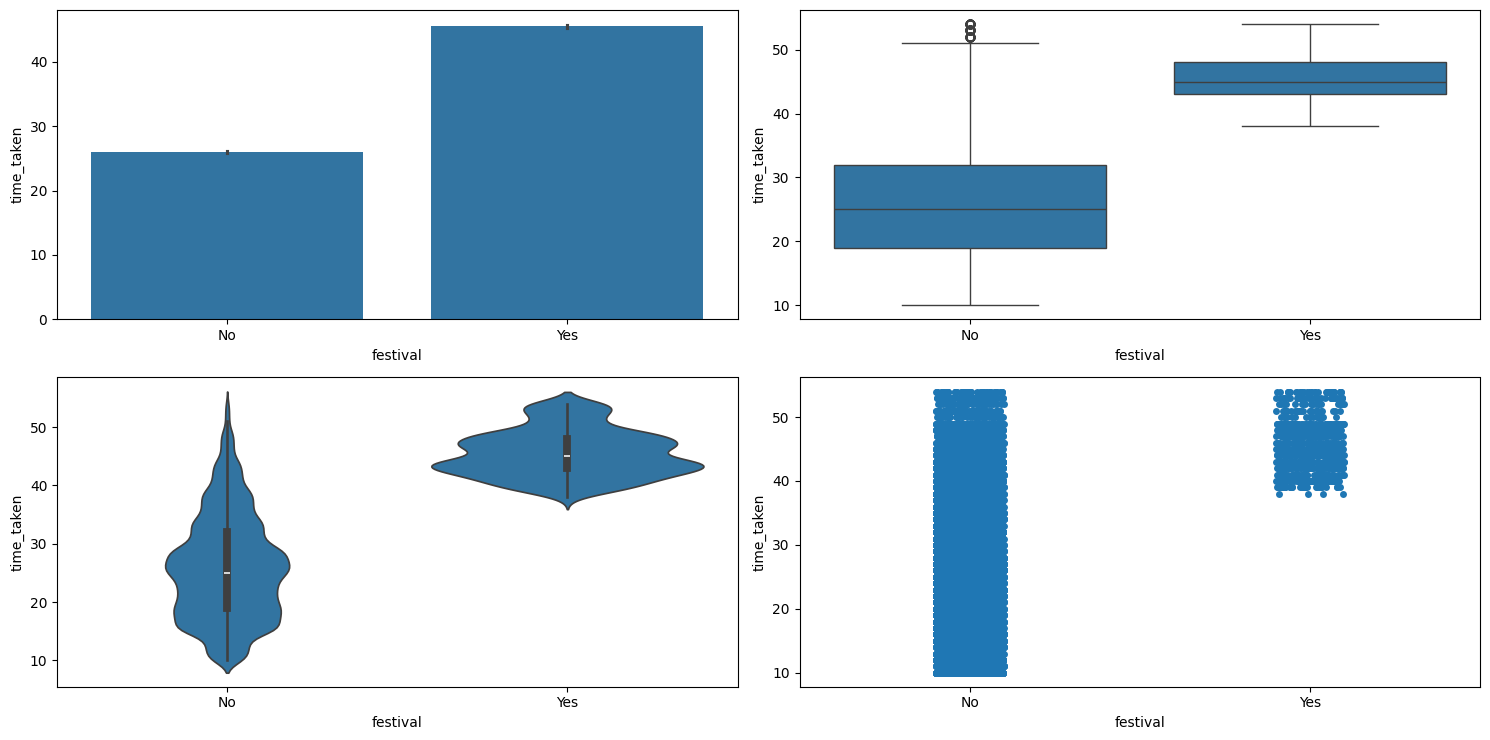

In [ ]:
# festivals and target analysis

numerical_categorical_analysis(df_final, "festival", "time_taken")

### Observations: Festival vs Time Taken

1. **Average Delivery Time**  
   - The average time taken for delivery is **significantly higher during festivals** compared to non-festival days.

2. **Range & Variation**  
   - On non-festival days, delivery times range widely (around **10 to 50+ minutes**) with noticeable variation.  
   - During festivals, the range is narrower (mostly **40–50 minutes**) but consistently higher.  
   - This indicates that **deliveries during festivals are uniformly slower**, with less variation.

3. **Distribution Shape (Violin Plot)**  
   - Non-festival deliveries have a **broader distribution**, meaning some are quick (10–20 mins), while others are slower.  
   - Festival deliveries show a **compressed distribution at the higher end**, clustering around 40–50 mins.

4. **Boxplot View**  
   - The **median delivery time** during festivals is much higher than on non-festival days.  
   - Outliers are mostly visible in non-festival deliveries (very fast or very slow cases).  
   - Festival deliveries are more **consistent but slower overall**.

---

**EDA Insight**:  
- **Festivals cause longer delivery times**, likely due to high demand, traffic, and operational load.  
- Although variation reduces (everyone is delayed more equally), this **consistent delay negatively impacts customer ratings** as seen in earlier plots.  


In [ ]:
# do festival affect traffic

chi_2_test(df_final, "festival", "traffic")

1.0490531516981607e-153
Reject the null hypothesis. There is a significant association between festival and traffic.


The p value is very small which mans it does affect traffic.

In [ ]:
df_final.pivot_table(index="traffic",columns="festival",values="time_taken",aggfunc="mean")

festival         No        Yes
traffic                       
High      27.010378  45.826087
Jam       30.537234  46.093651
Low       21.284024  42.020000
Medium    26.550297  43.715385

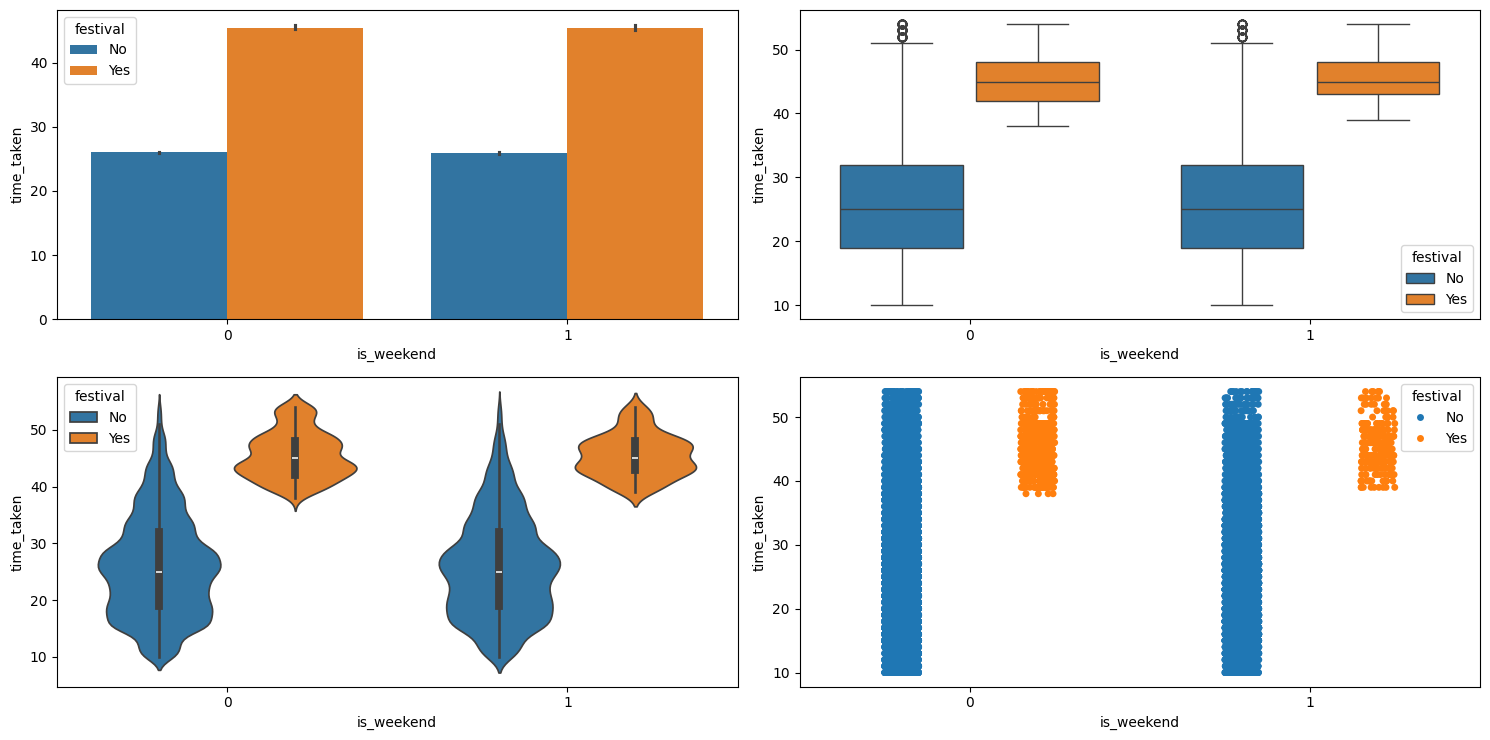

In [ ]:
# does a weekend and a festival combined have an effect on delivery times

multivariate_analysis(df_final, "time_taken", "is_weekend", "festival")

In [ ]:
# time related columns

time_subset = df_final.loc[:,["order_time_hour","order_time_of_day","pickup_time_minutes"]]

time_subset

order_time_hour order_time_of_day  pickup_time_minutes
0                 21.0             night                 15.0
1                 14.0         afternoon                 10.0
2                 17.0           evening                 10.0
3                  9.0           morning                 10.0
4                 19.0           evening                 15.0
...                ...               ...                  ...
45488             11.0           morning                 10.0
45489             19.0           evening                 15.0
45490             23.0             night                 15.0
45491             13.0         afternoon                  5.0
45492             17.0           evening                  5.0

[45493 rows x 3 columns]

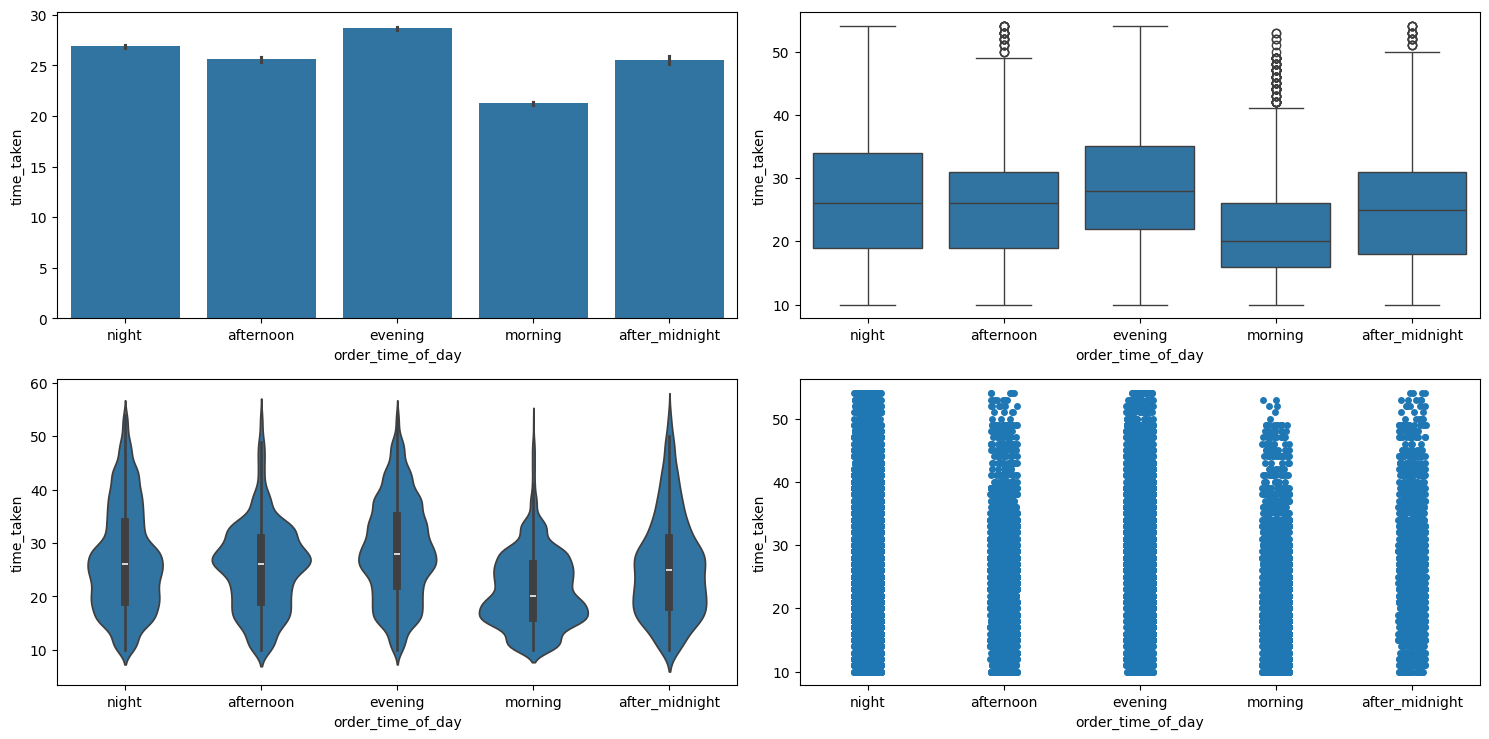

In [ ]:
# does time of day affects delivery times

numerical_categorical_analysis(df_final, "order_time_of_day", "time_taken")

In [ ]:
# relationship between time of day and traffic

chi_2_test(df_final, "order_time_of_day", "traffic")

0.0
Reject the null hypothesis. There is a significant association between order_time_of_day and traffic.


In [ ]:
# anova test

anova_test(df_final, "time_taken", "order_time_of_day")

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and order_time_of_day.


In [ ]:
# Top 5 times(hrs) of the day in which customers  order the most

df_final["order_time_hour"].value_counts().head(5)

order_time_hour
19.0    5042
22.0    4998
21.0    4685
18.0    4479
17.0    4211
Name: count, dtype: int64

Count Percentage
order_time_hour                  
19.0              5042      11.5%
22.0              4998      11.4%
21.0              4685     10.68%
18.0              4479     10.21%
17.0              4211       9.6%
23.0              4089      9.32%
20.0              4089      9.32%
10.0              2184      4.98%
9.0               1947      4.44%
8.0               1817      4.14%
11.0              1768      4.03%
12.0               892      2.03%
15.0               873      1.99%
13.0               857      1.95%
16.0               775      1.77%
14.0               717      1.64%
0.0                430      0.98%

**************************************************
The unique categories in order_time_hour column are [21.0, 14.0, 17.0, 9.0, 19.0, 20.0, 22.0, 8.0, 12.0, 18.0, 23.0, 13.0, 10.0, nan, 16.0, 11.0, 15.0, 0.0]
**************************************************
The number of categories in order_time_hour column are 17


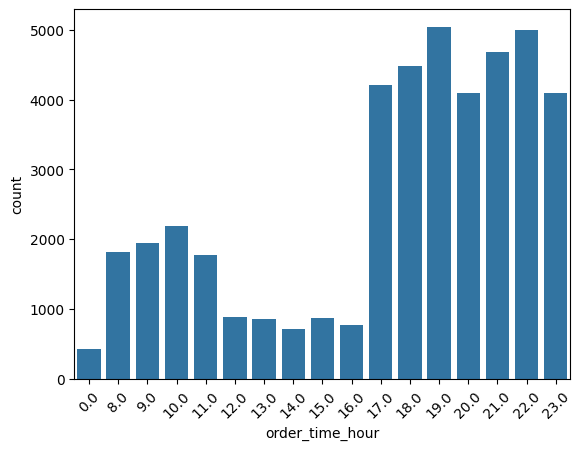

In [ ]:
# categorical analysis on order_time_hour

categorical_analysis(df_final, "order_time_hour")

Count Percentage
order_time_of_day                  
night              17861     39.26%
evening            13732     30.18%
morning             7716     16.96%
afternoon           4114      9.04%
after_midnight      2070      4.55%

**************************************************
The unique categories in order_time_of_day column are ['night', 'afternoon', 'evening', 'morning', 'after_midnight']
**************************************************
The number of categories in order_time_of_day column are 5


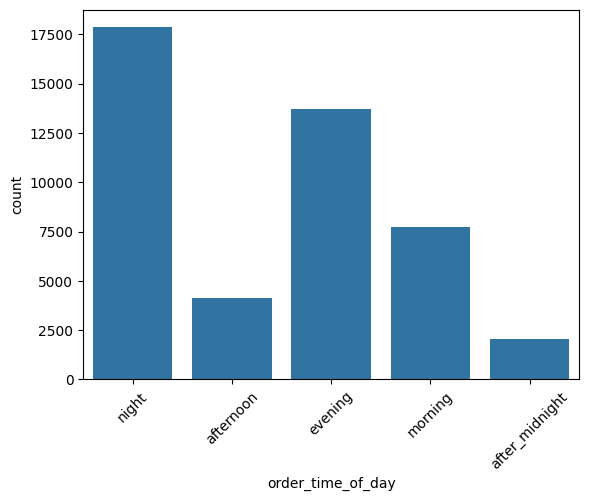

In [ ]:
# categorical analysis on time of day

categorical_analysis(df_final, "order_time_of_day")


### PickUp Time

In [ ]:
# pickup_time datatype

df_final['pickup_time_minutes'].dtype

dtype('float64')

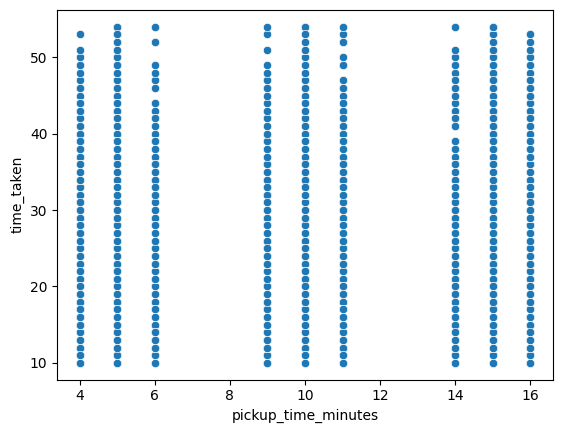

In [ ]:
# relationship between pickup time and delivery time

sns.scatterplot(df_final,x="pickup_time_minutes",y="time_taken")
plt.show()

**Convert the column to ordinal categorical column**

Count Percentage
pickup_time_minutes                  
5.0                  13948     31.81%
15.0                 13853     31.59%
10.0                 13730     31.31%
11.0                   425      0.97%
16.0                   406      0.93%
9.0                    391      0.89%
4.0                    380      0.87%
6.0                    373      0.85%
14.0                   347      0.79%

**************************************************
The unique categories in pickup_time_minutes column are [15.0, 10.0, 5.0, 11.0, nan, 4.0, 14.0, 6.0, 9.0, 16.0]
**************************************************
The number of categories in pickup_time_minutes column are 9


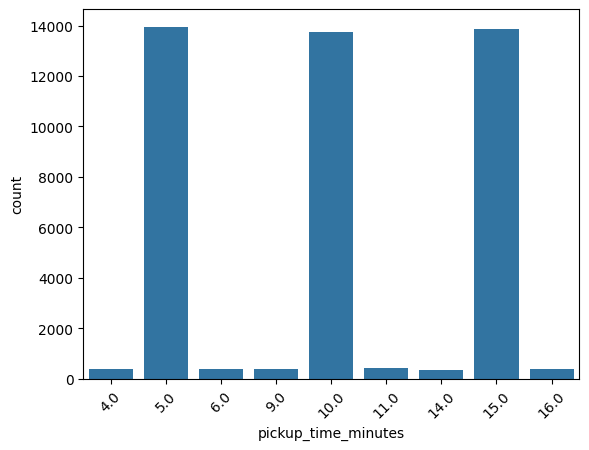

In [ ]:
# pickup time categorical analysis

categorical_analysis(df_final, "pickup_time_minutes")


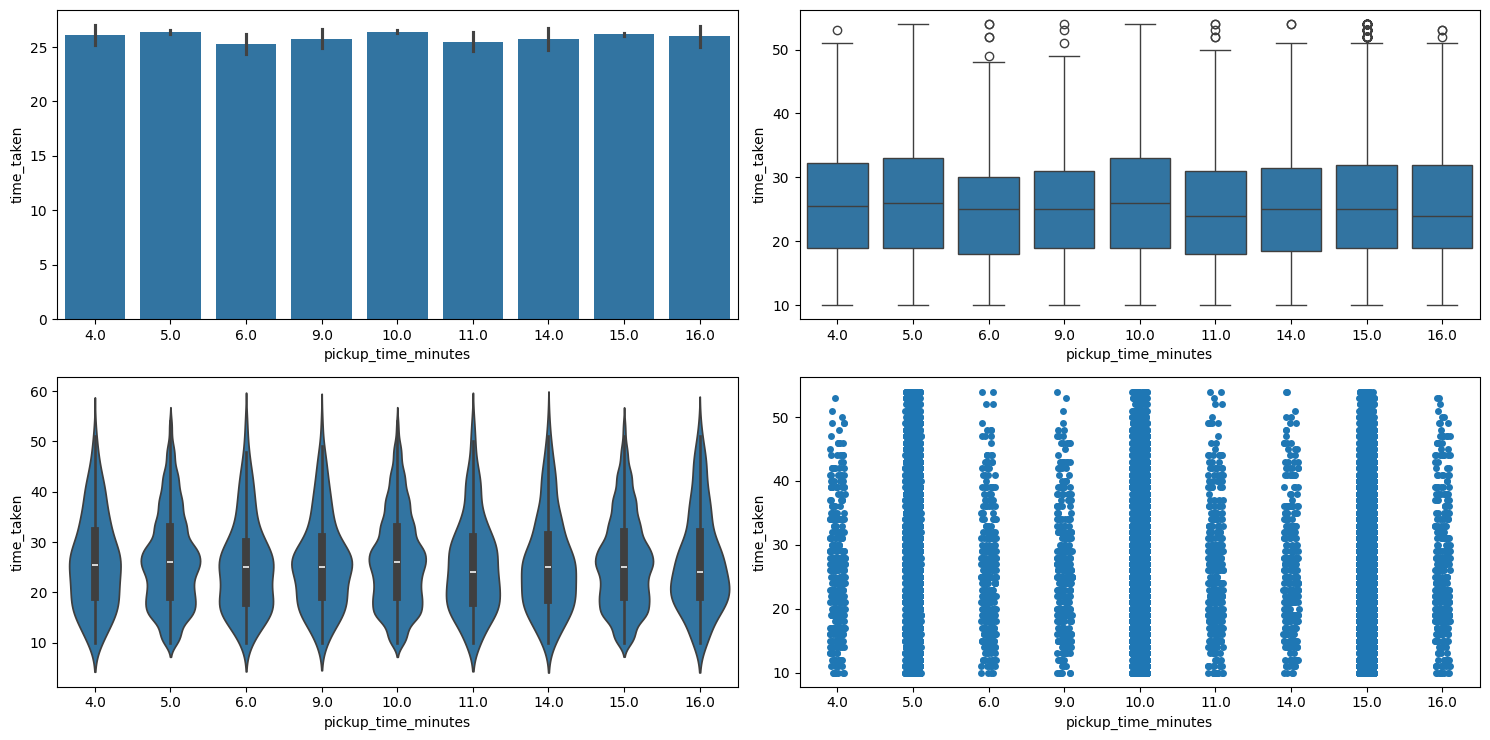

In [ ]:
# does pickup time have an effect on delivery time

numerical_categorical_analysis(df_final, "pickup_time_minutes", "time_taken")

### Traffic

Count Percentage
traffic                  
Low      15476      34.4%
Jam      14139     31.43%
Medium   10945     24.33%
High      4423      9.83%

**************************************************
The unique categories in traffic column are ['Jam', 'High', 'Medium', 'Low', nan]
**************************************************
The number of categories in traffic column are 4


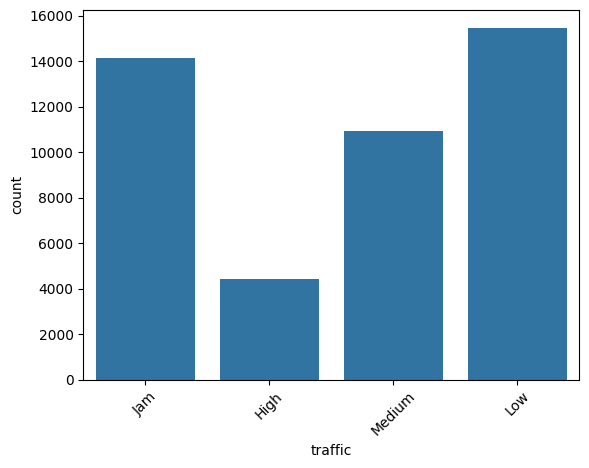

In [ ]:
# categorical analysis on traffic

categorical_analysis(df_final, "traffic")

In [ ]:
# does traffic depends on type of city

chi_2_test(df_final, "traffic", "city_type")

2.628471738211753e-104
Reject the null hypothesis. There is a significant association between traffic and city_type.


In [ ]:
# does traffic depends on city

chi_2_test(df_final, "traffic", "city_name")

0.4986111514742097
Fail to reject the null hypothesis. There is no significant association between traffic and city_name.


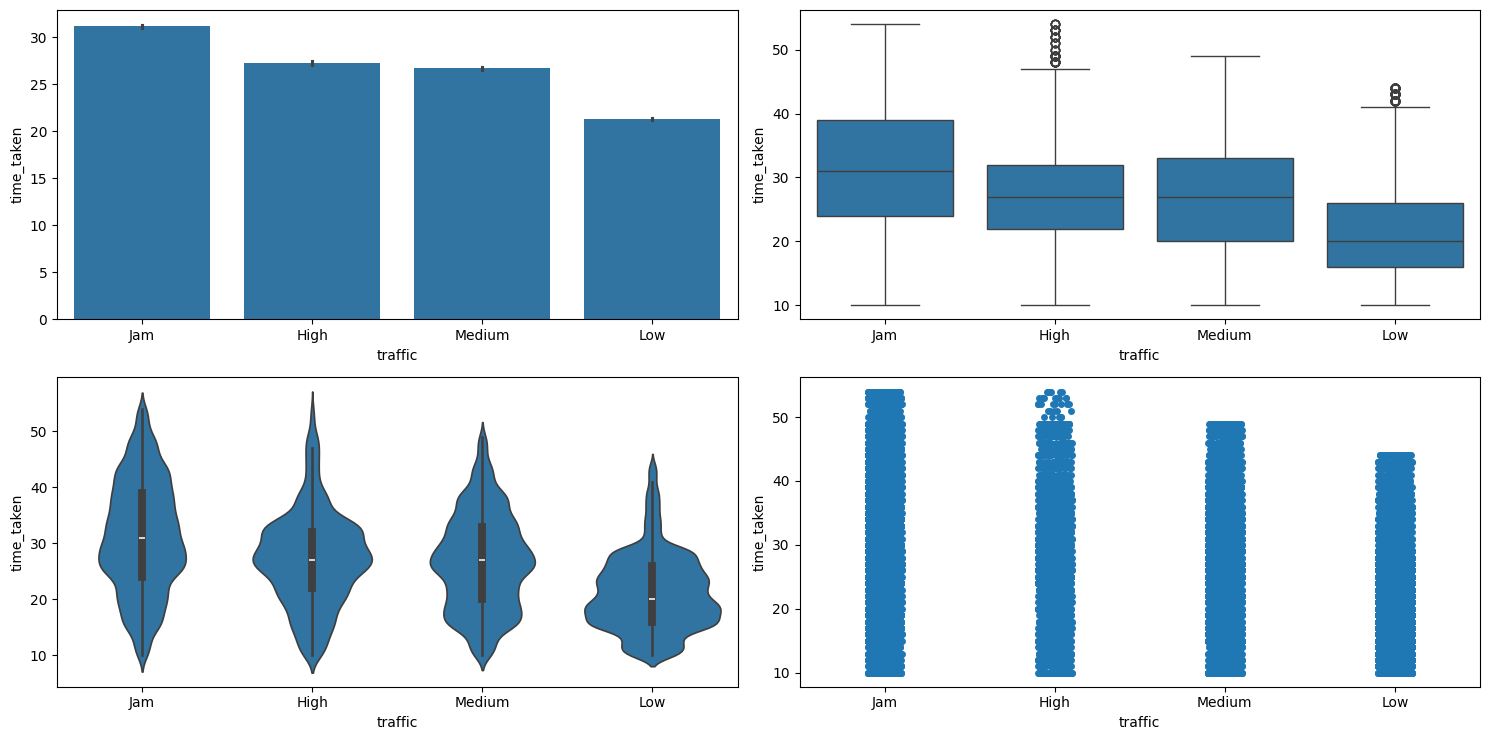

In [ ]:
# does traffic affects delivery times

numerical_categorical_analysis(df_final, "traffic", "time_taken")

In [ ]:
# hypothesis test on does traffic affects delivery times

anova_test(df_final, "time_taken", "traffic")

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and traffic.


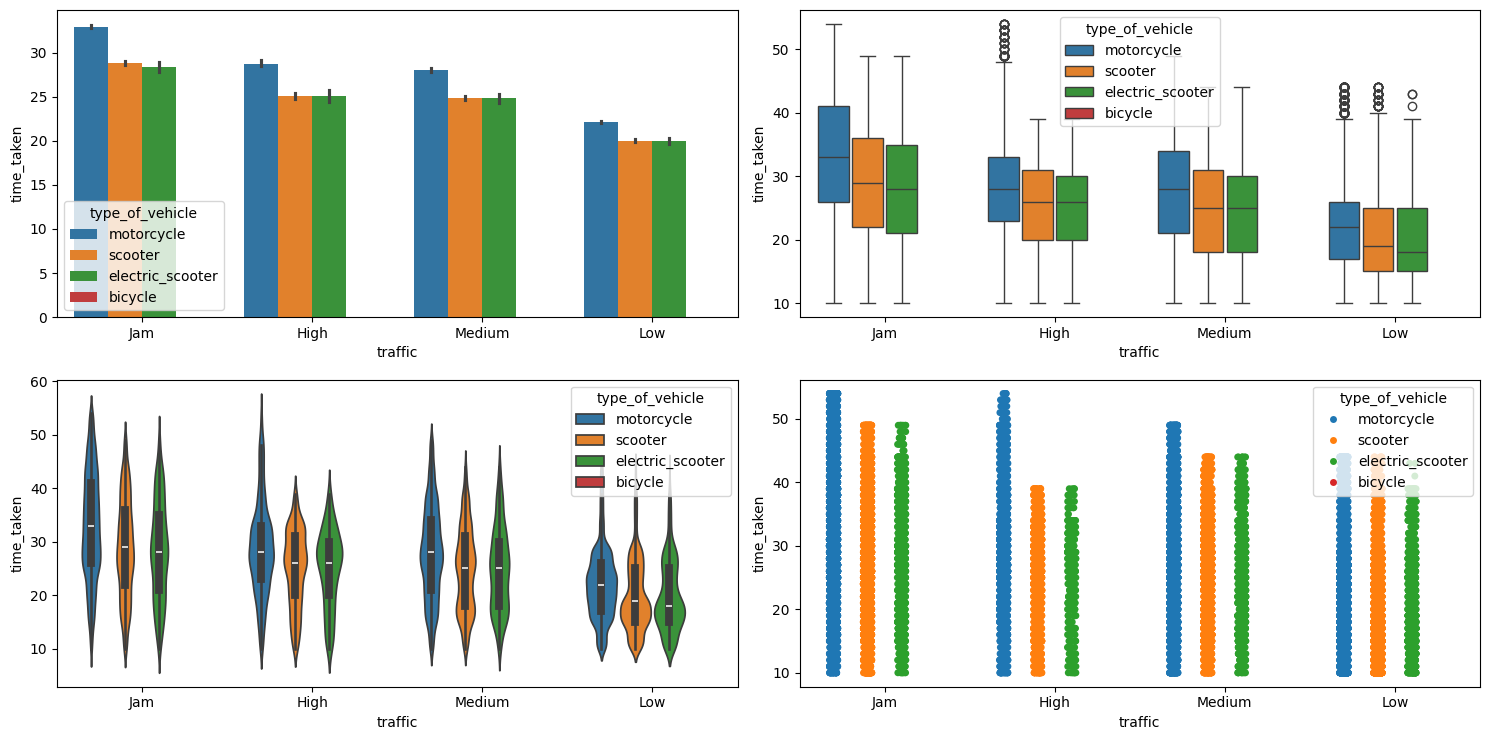

In [ ]:
# are some vehicle types more suitable in traffic than others

multivariate_analysis(df_final, "time_taken", "traffic", "type_of_vehicle")

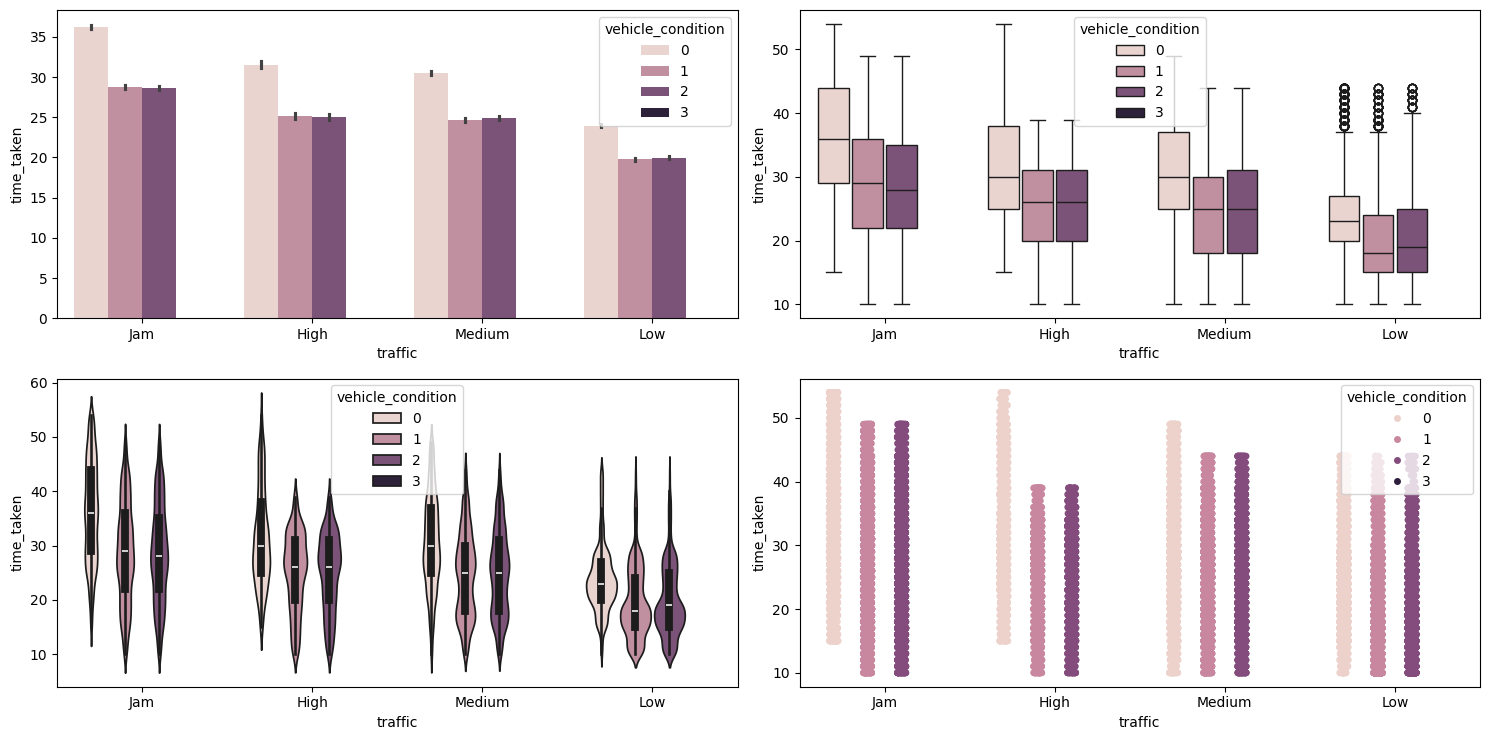

In [ ]:
# does vehicle condition in traffic situations affects delivery times

multivariate_analysis(df_final, "time_taken", "traffic", "vehicle_condition")

Dont make wrong interpretations that good condition vehicles takes longer times on avg

This simply means that good vehicles are preferred for deliveries during festivals which results in longer delivery times

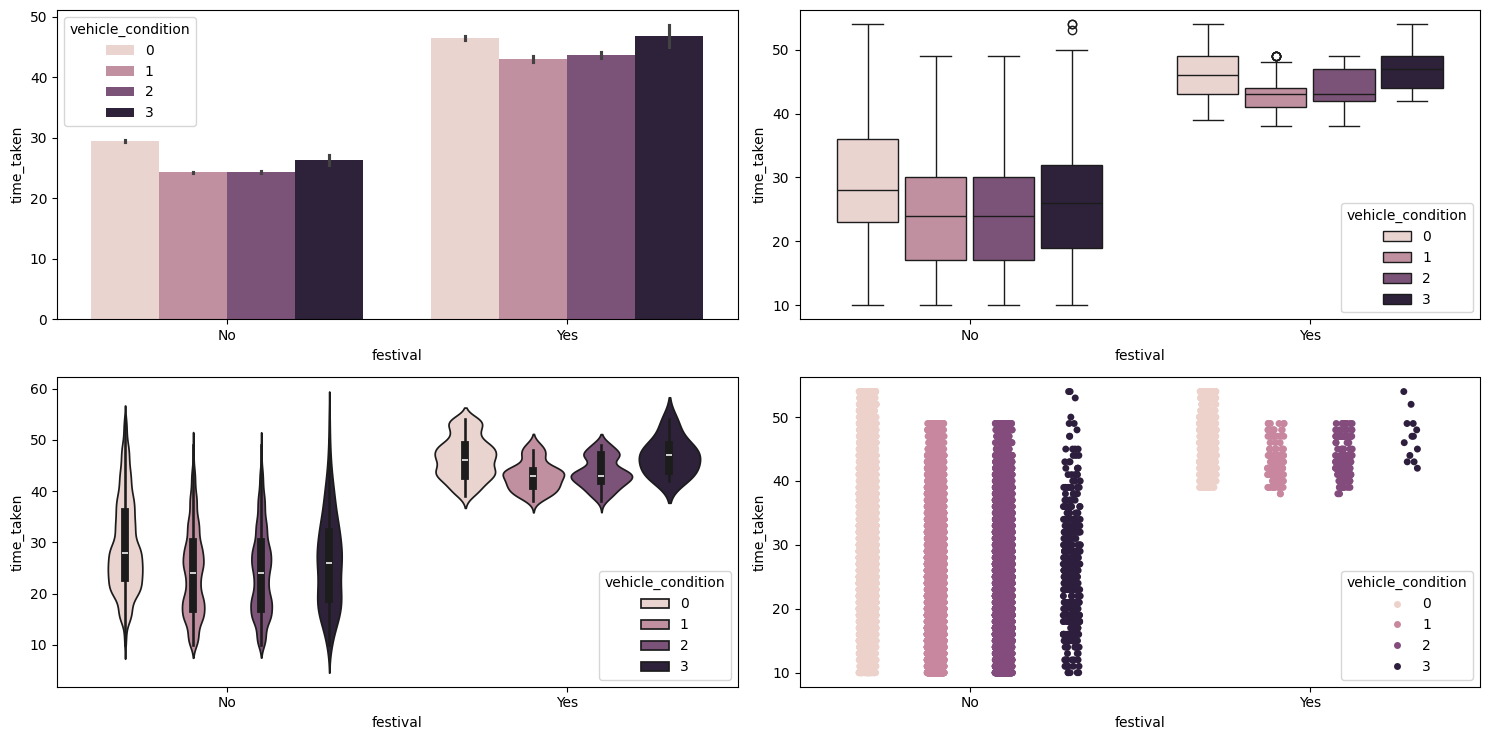

In [ ]:
multivariate_analysis(df_final, "time_taken", "festival", "vehicle_condition")

### Multiple Deliveries

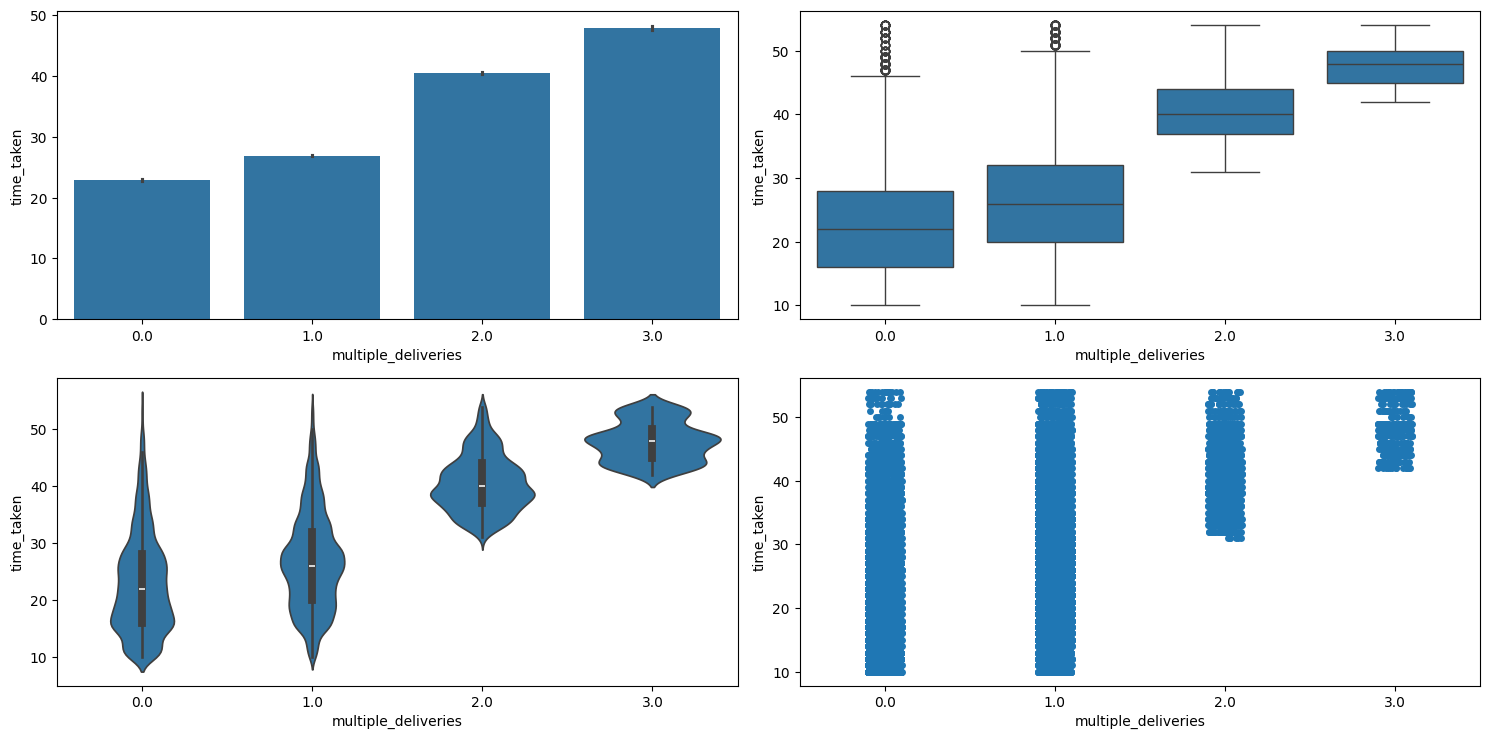

In [ ]:
# does multiple delivereis affect delivery times

numerical_categorical_analysis(df_final, "multiple_deliveries", "time_taken")

In [ ]:
# hypothesis test

anova_test(df_final, "time_taken", "multiple_deliveries")

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and multiple_deliveries.


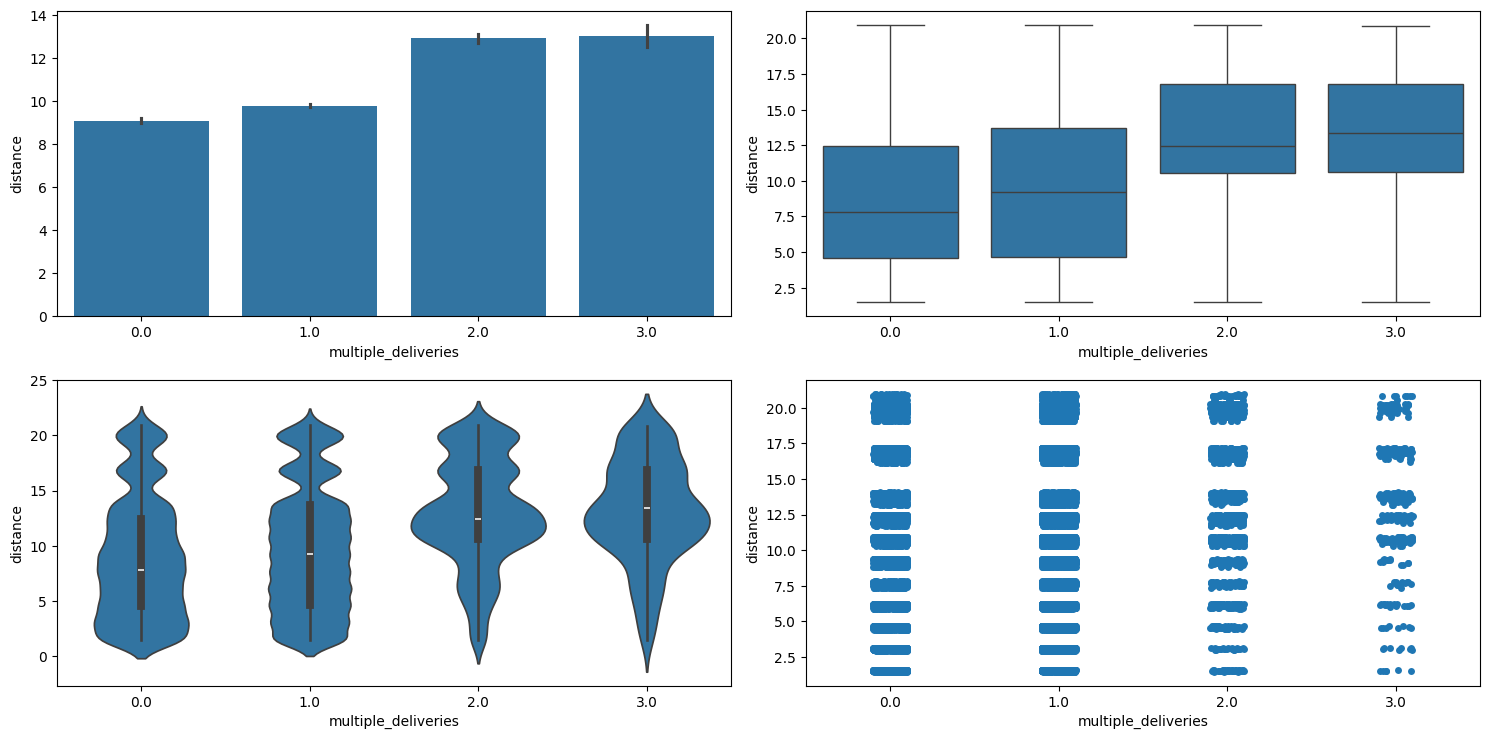

In [ ]:
# do multiple deliveries are of longer distances

numerical_categorical_analysis(df_final, "multiple_deliveries", "distance")

### Weather

Count Percentage
weather                     
Fog          7653     17.02%
Stormy       7584     16.87%
Cloudy       7533     16.75%
Sandstorms   7494     16.67%
Windy        7422     16.51%
Sunny        7282     16.19%

**************************************************
The unique categories in weather column are ['Fog', 'Stormy', 'Sandstorms', 'Windy', 'Cloudy', 'Sunny', nan]
**************************************************
The number of categories in weather column are 6


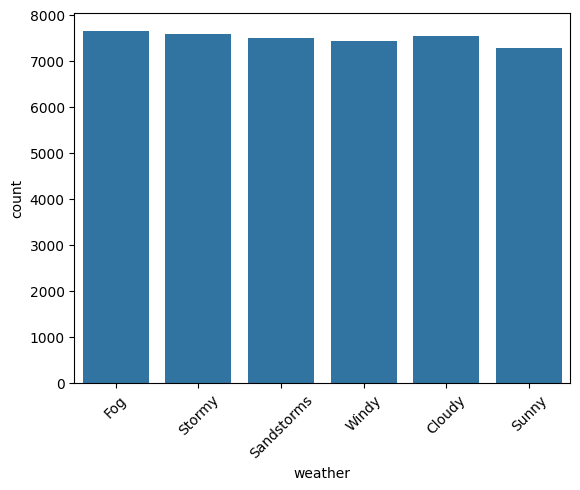

In [ ]:
# categorical analysis on type of weather

categorical_analysis(df_final, "weather")

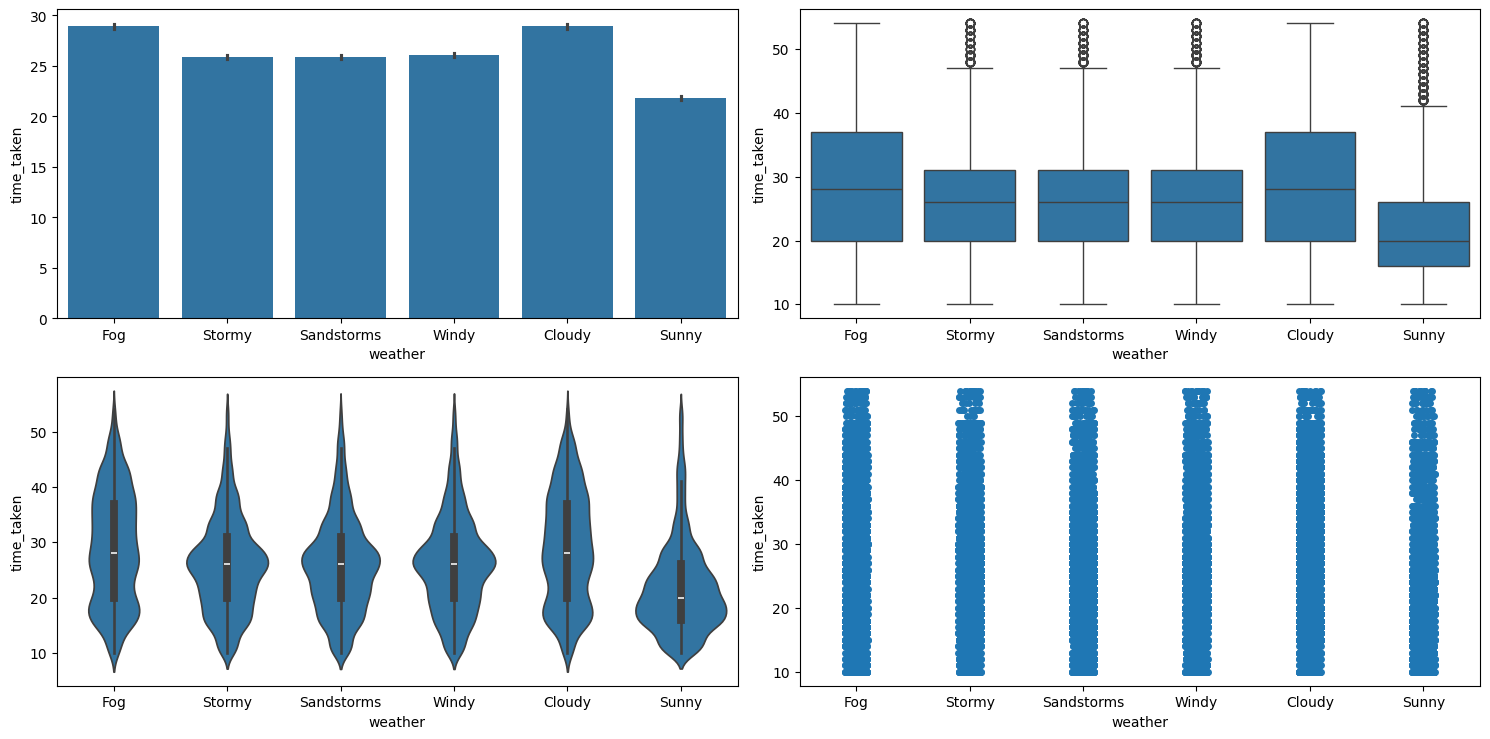

In [ ]:
# does weather affect delivery times

numerical_categorical_analysis(df_final, "weather", "time_taken")

In [ ]:
# hypothesis test

anova_test(df_final, "time_taken", "weather")

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and weather.


In [ ]:
# does the weather affects traffic

chi_2_test(df_final, "weather", "traffic")

0.47921317987843914
Fail to reject the null hypothesis. There is no significant association between weather and traffic.


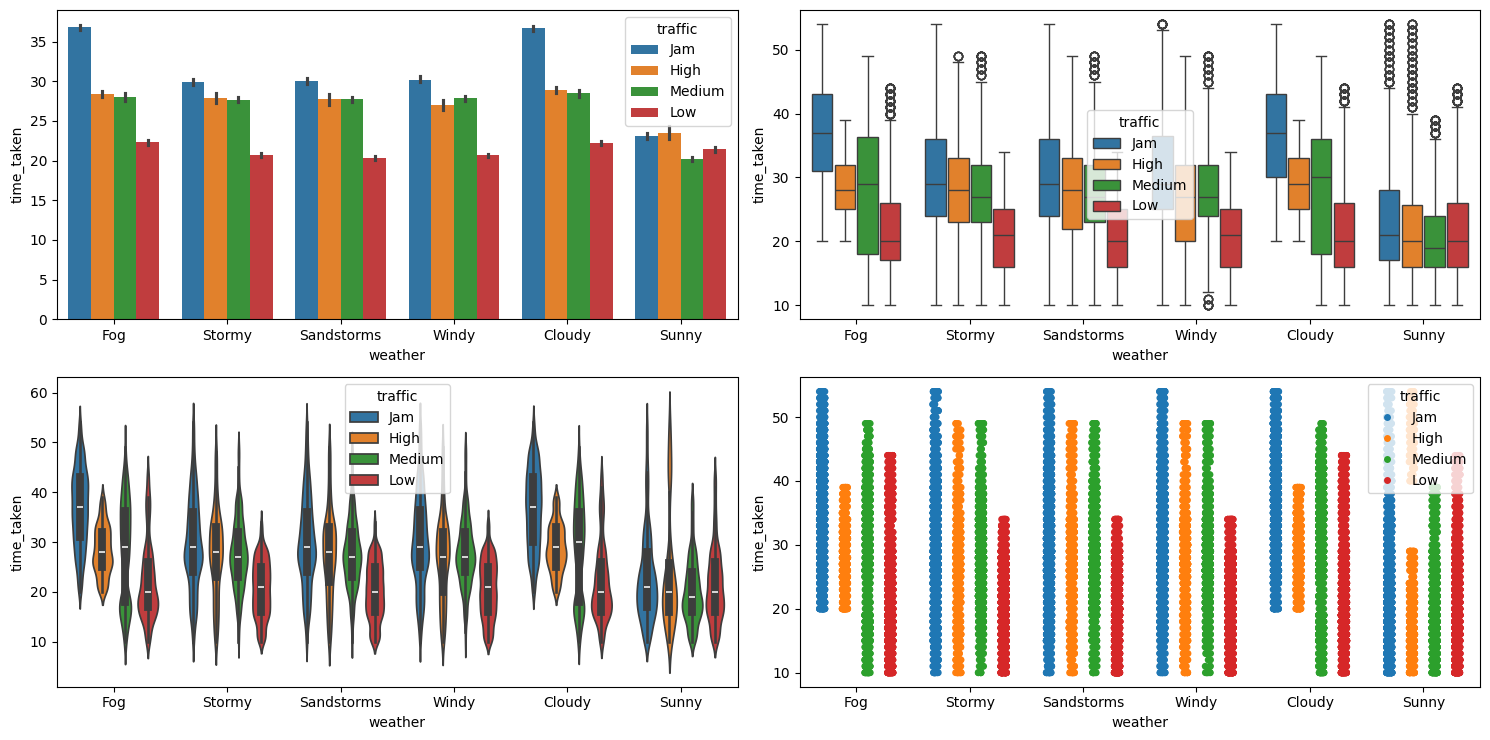

In [ ]:
# delivery times based on weather and traffic

multivariate_analysis(df_final, "time_taken", "weather", "traffic")

**Seems like traffic along with other features combined acts as great discriminatory feature**

In [ ]:
# pivot table

df_final.pivot_table(index="weather",columns="traffic",values="time_taken",aggfunc="mean")

traffic          High        Jam        Low     Medium
weather                                               
Cloudy      28.939435  36.694208  22.208445  28.481219
Fog         28.426546  36.805601  22.303427  28.044816
Sandstorms  27.711840  30.018758  20.294862  27.738522
Stormy      27.845839  29.847049  20.681734  27.680502
Sunny       23.448229  23.082132  21.449293  20.195067
Windy       26.972789  30.219056  20.665862  27.888769

### Vehicle - Condition and Type

Count Percentage
vehicle_condition                  
2                  15031     33.04%
1                  15028     33.03%
0                  15005     32.98%
3                    429      0.94%

**************************************************
The unique categories in vehicle_condition column are [2, 1, 0, 3]
**************************************************
The number of categories in vehicle_condition column are 4


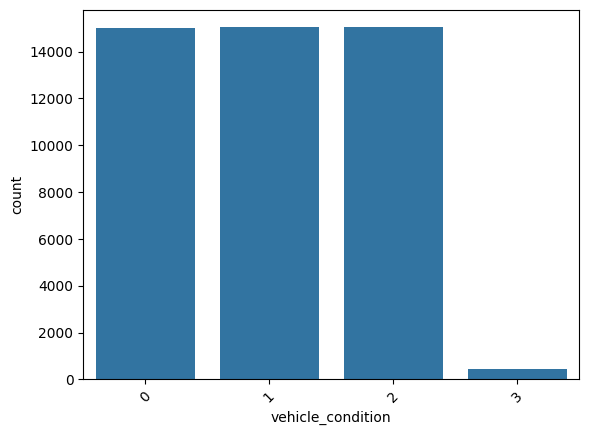

In [ ]:
# categorical analysis on vehicle condition

categorical_analysis(df_final, "vehicle_condition")

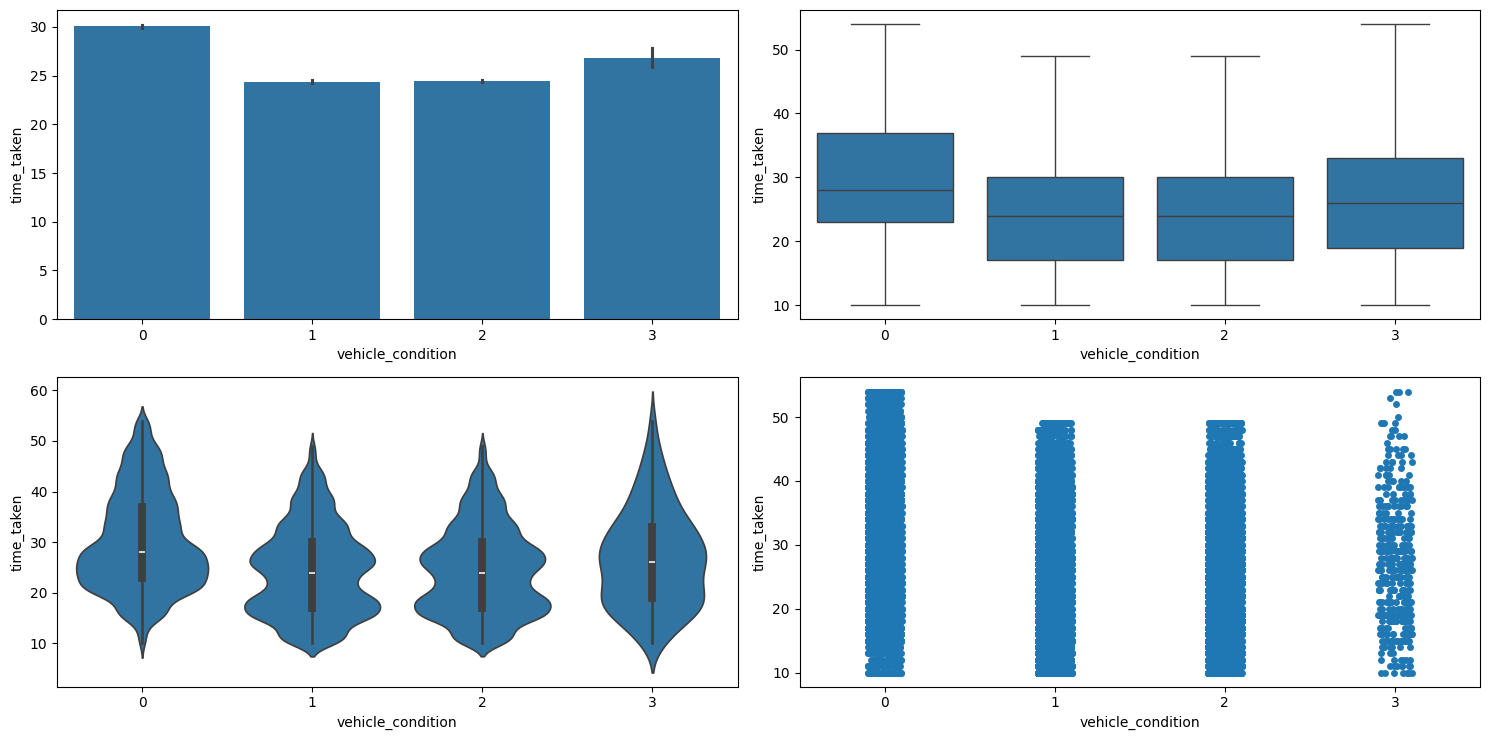

In [ ]:
# does vehicle condition affect delivery times

numerical_categorical_analysis(df_final, "vehicle_condition", "time_taken")

In [ ]:
# anova test

anova_test(df_final, "time_taken", "vehicle_condition")

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and vehicle_condition.


Count Percentage
type_of_vehicle                   
motorcycle        26421     58.08%
scooter           15241      33.5%
electric_scooter   3778       8.3%
bicycle              53      0.12%

**************************************************
The unique categories in type_of_vehicle column are ['motorcycle', 'scooter', 'electric_scooter', 'bicycle']
**************************************************
The number of categories in type_of_vehicle column are 4


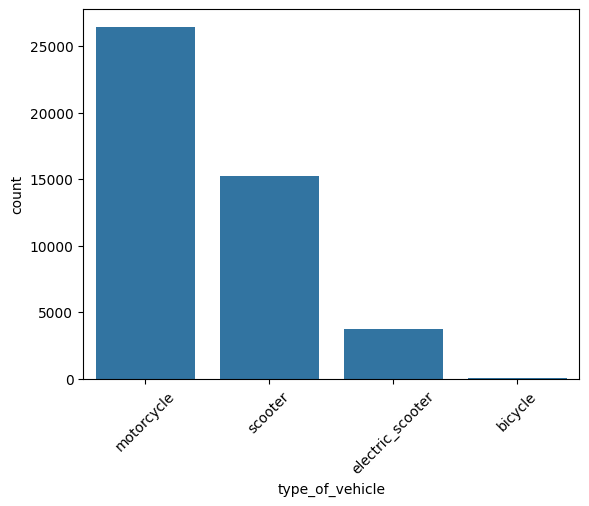

In [ ]:
# analysis on vehicle type

categorical_analysis(df_final, "type_of_vehicle")

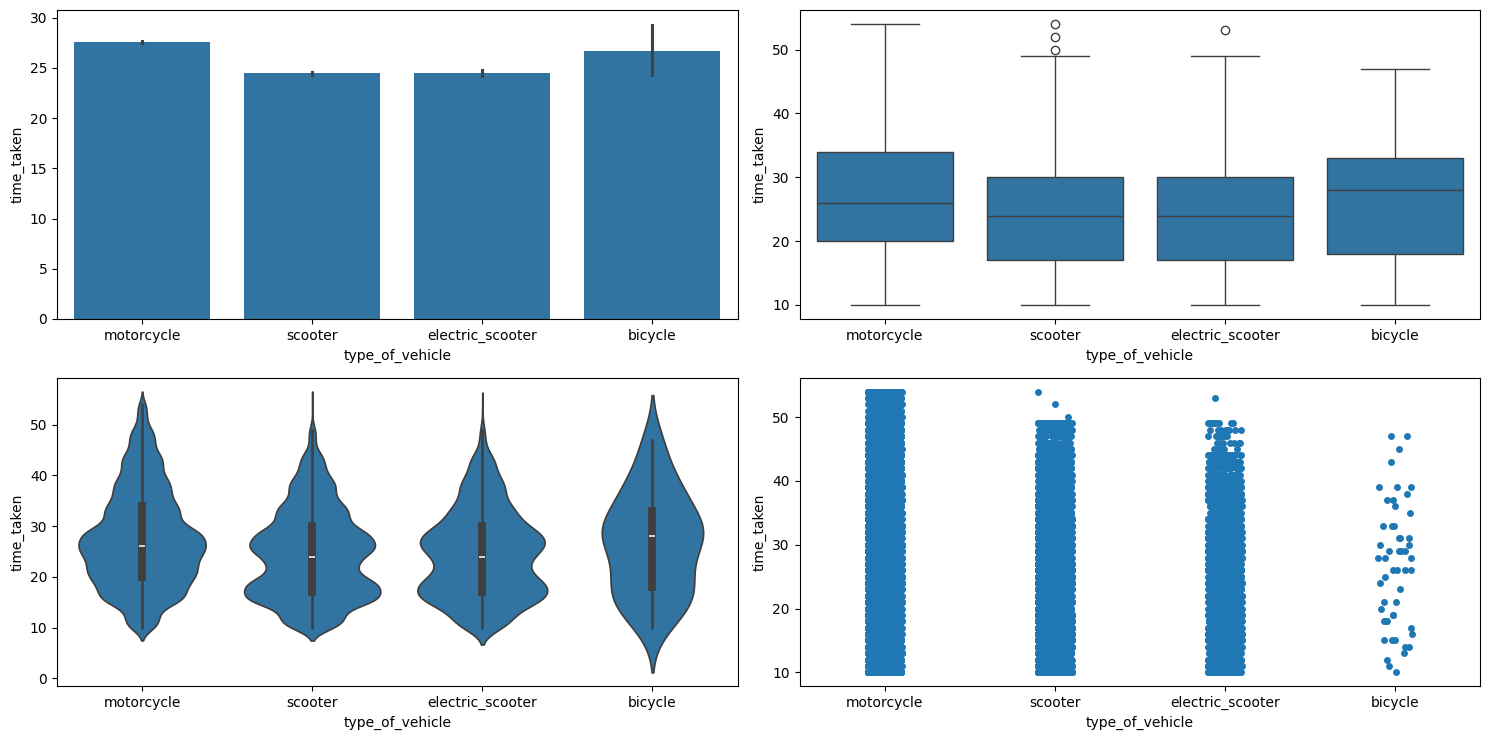

In [ ]:
# does the type of vehicle affects delivery time

numerical_categorical_analysis(df_final, "type_of_vehicle", "time_taken")

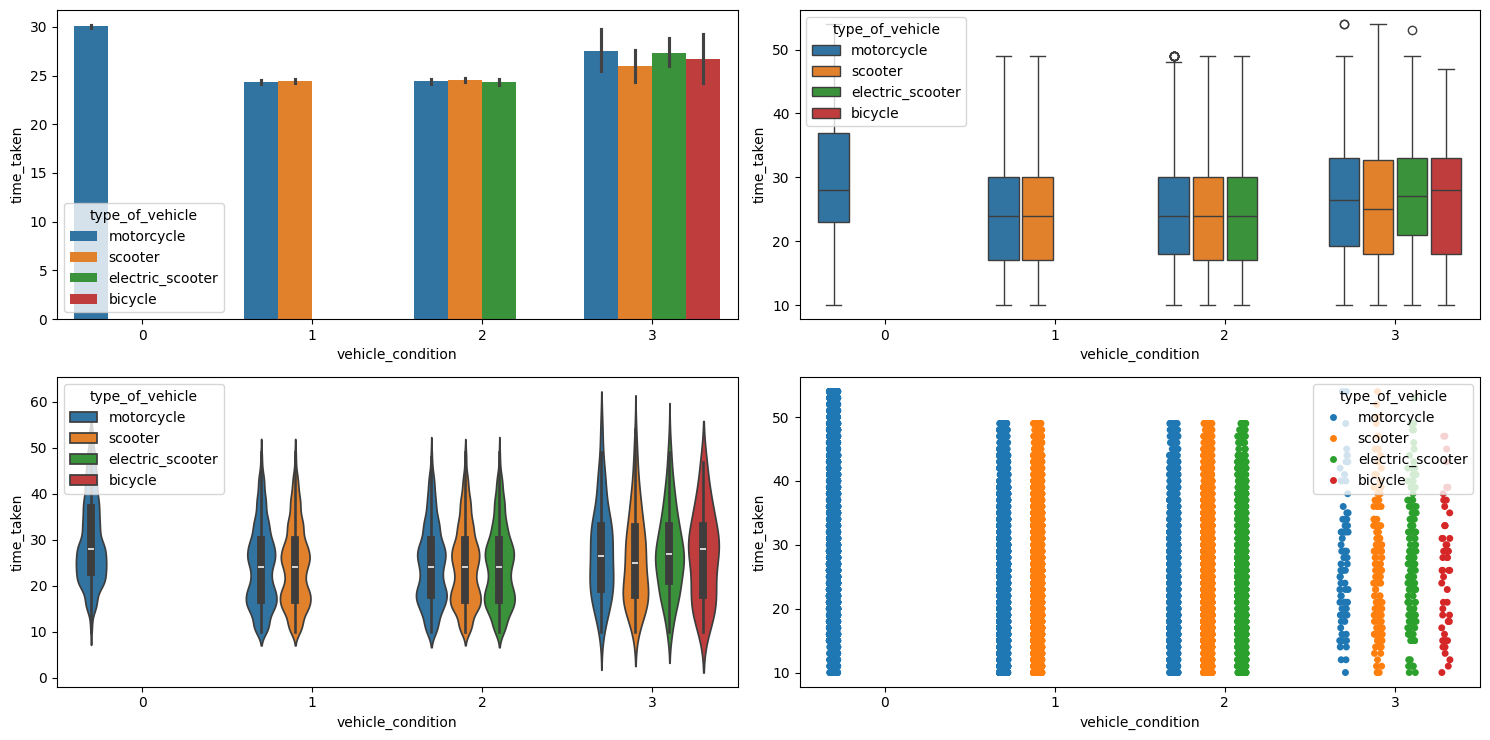

In [ ]:
# vehicle condition and type

multivariate_analysis(df_final, "time_taken", "vehicle_condition", "type_of_vehicle")

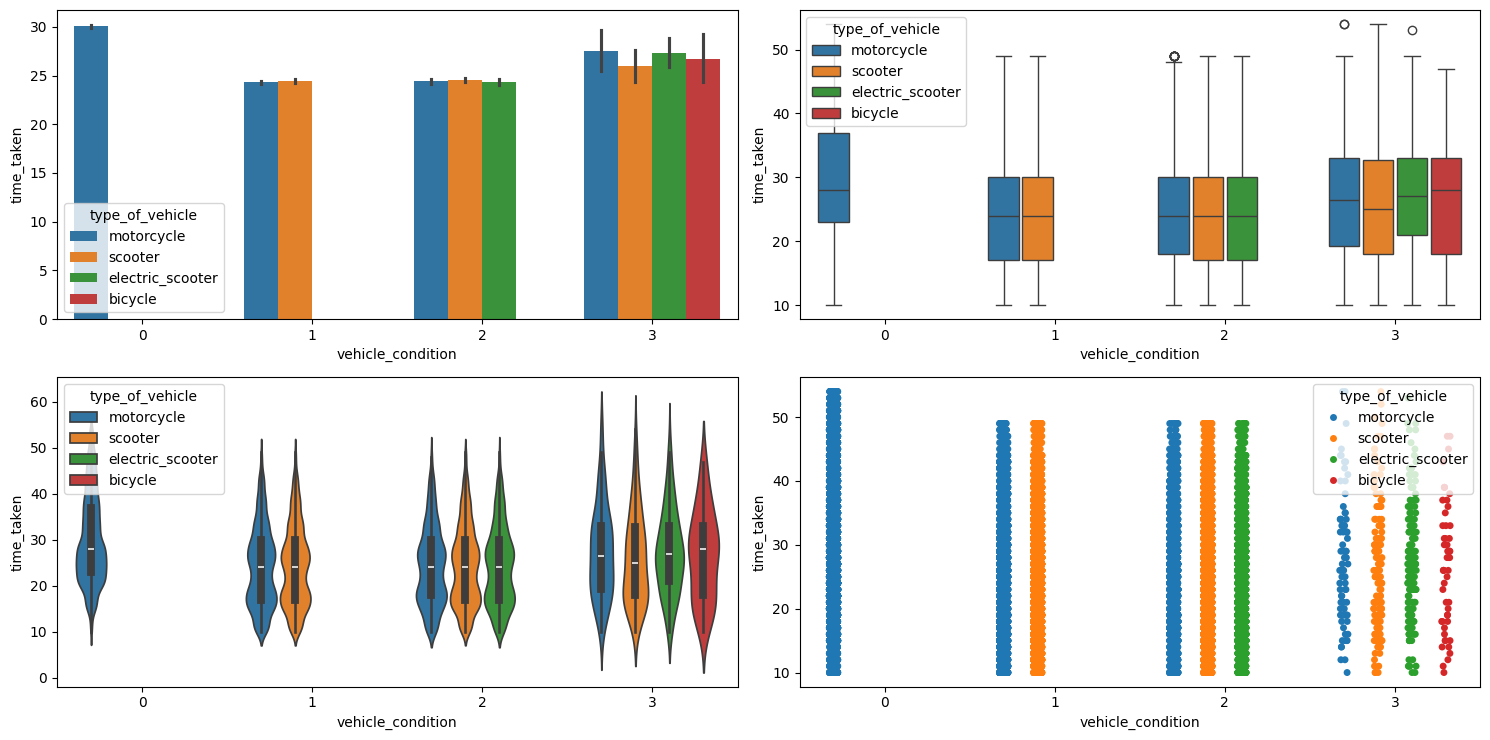

In [ ]:
# vehicle condition and type

multivariate_analysis(df_final, "time_taken", "vehicle_condition", "type_of_vehicle")

In [ ]:
# is their a relation between vehicle type and conditions

chi_2_test(df_final, "type_of_vehicle", "vehicle_condition")

0.0
Reject the null hypothesis. There is a significant association between type_of_vehicle and vehicle_condition.


### Type of Order

Count Percentage
type_of_order                  
Snack          11509      25.3%
Meal           11433     25.13%
Drinks         11293     24.82%
Buffet         11258     24.75%

**************************************************
The unique categories in type_of_order column are ['Snack', 'Meal', 'Drinks', 'Buffet']
**************************************************
The number of categories in type_of_order column are 4


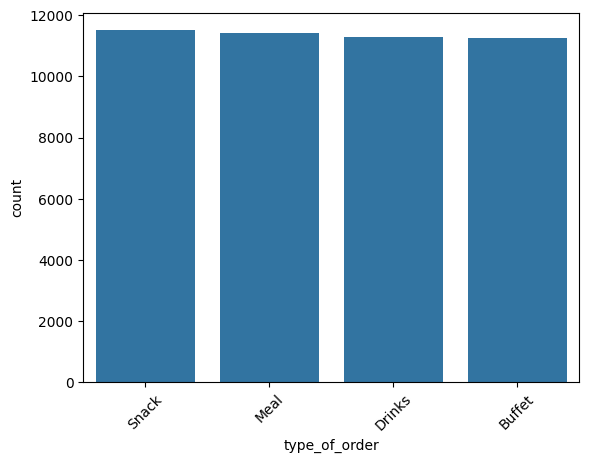

In [ ]:
# analysis on type of order

categorical_analysis(df_final, "type_of_order")

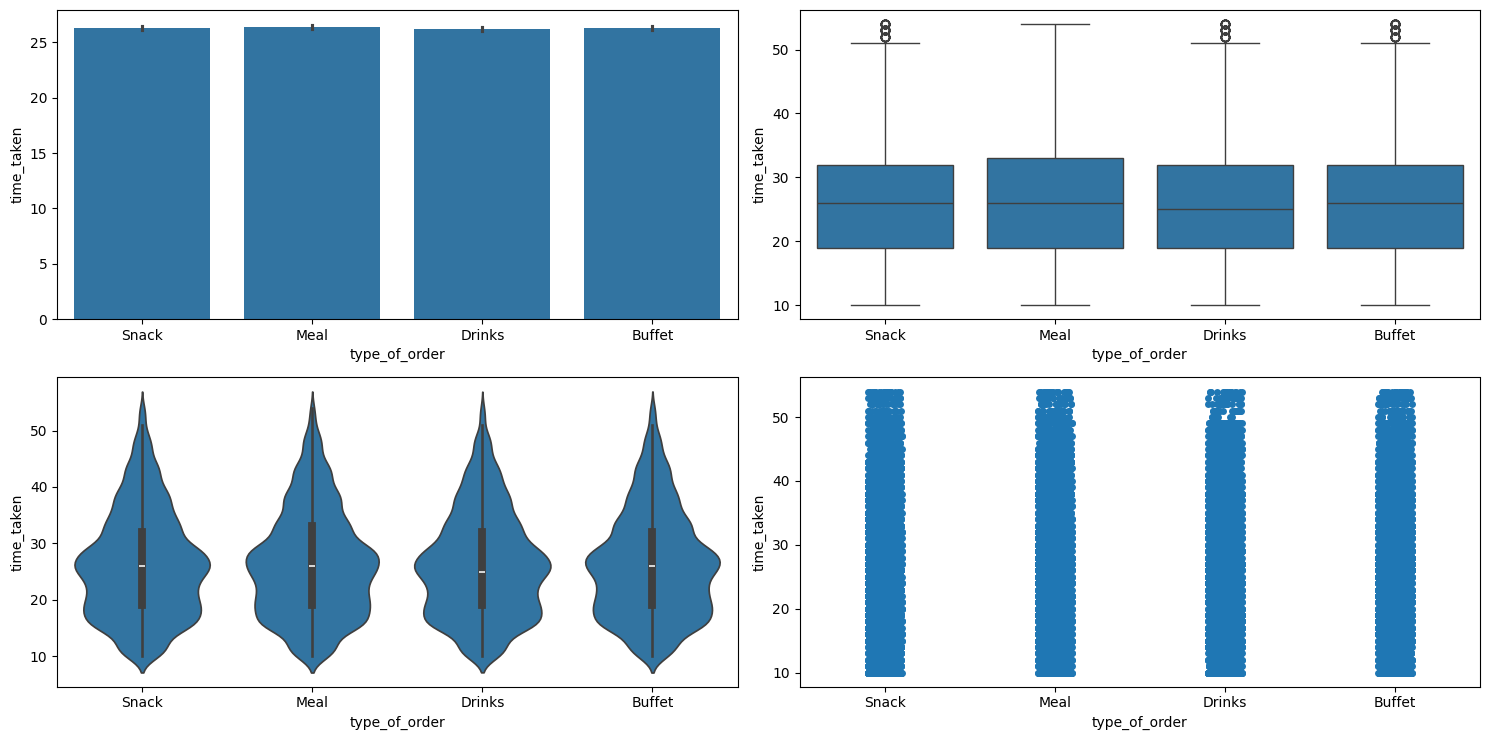

In [ ]:
# does order type have have effect on delivery times

numerical_categorical_analysis(df_final, "type_of_order", "time_taken")

In [ ]:
# hypothesis test

anova_test(df_final, "time_taken", "type_of_order")

0.3112044787020628
Fail to reject the null hypothesis. There is no significant relationship between time_taken and type_of_order.


In [ ]:
# contingency table

pd.crosstab(df_final["type_of_order"],df_final["is_weekend"])

is_weekend        0     1
type_of_order            
Buffet         8236  3022
Drinks         8130  3163
Meal           8288  3145
Snack          8336  3173

In [ ]:
# does type of order have an effect over pickup time

chi_2_test(df_final,"pickup_time_minutes","type_of_order")

0.8870134025997422
Fail to reject the null hypothesis. There is no significant association between pickup_time_minutes and type_of_order.


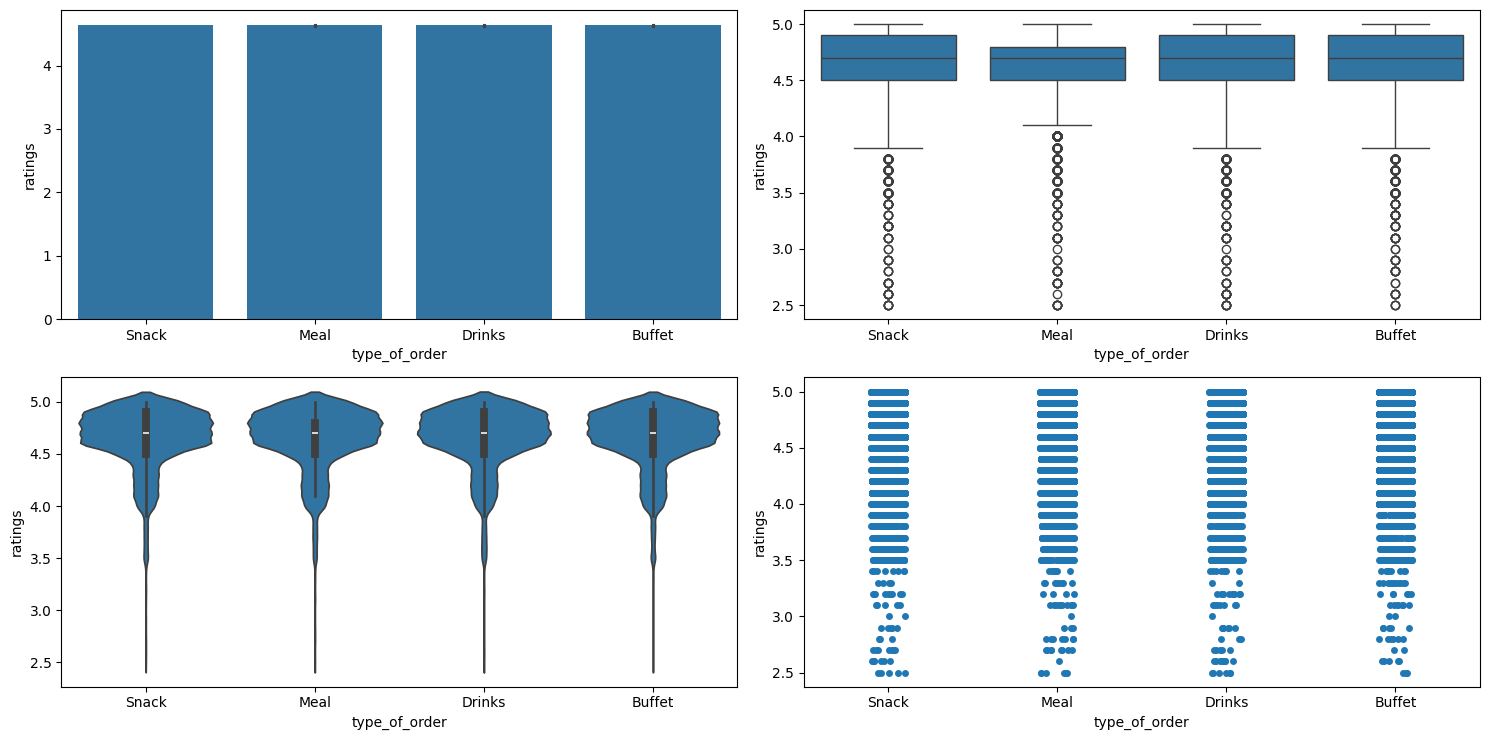

In [ ]:
# does order type has an effect on ratings

numerical_categorical_analysis(df_final, "type_of_order", "ratings")

In [ ]:
# is their a relationship between weekends and type of order

chi_2_test(df_final, "is_weekend", "type_of_order")


0.26972445749077995
Fail to reject the null hypothesis. There is no significant association between is_weekend and type_of_order.


In [ ]:
# is their a relationship between festivals and type of order

chi_2_test(df_final, "festival", "type_of_order")

0.6143115613797732
Fail to reject the null hypothesis. There is no significant association between festival and type_of_order.


### City Name

Count Percentage
city_name                  
JAP         3439      7.56%
RANCHI      3221      7.08%
BANG        3182      6.99%
SUR         3182      6.99%
HYD         3175      6.98%
MUM         3168      6.96%
MYS         3163      6.95%
COIMB       3161      6.95%
VAD         3159      6.94%
INDO        3153      6.93%
CHEN        3131      6.88%
PUNE        3129      6.88%
AGR          761      1.67%
LUDH         758      1.67%
ALH          738      1.62%
KNP          737      1.62%
DEH          735      1.62%
GOA          709      1.56%
AURG         703      1.55%
KOC          701      1.54%
KOL          699      1.54%
BHP          689      1.51%

**************************************************
The unique categories in city_name column are ['DEH', 'KOC', 'PUNE', 'LUDH', 'KNP', 'MUM', 'MYS', 'HYD', 'KOL', 'RANCHI', 'COIMB', 'CHEN', 'JAP', 'SUR', 'BANG', 'GOA', 'AURG', 'AGR', 'VAD', 'ALH', 'BHP', 'INDO']
**************************************************
The number of categories in city_name column are 22


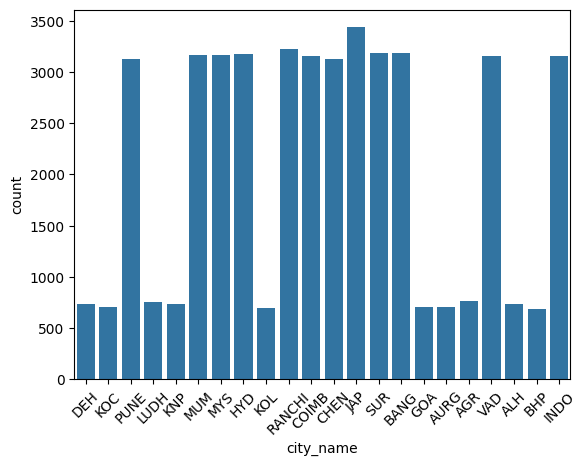

In [ ]:
# categorical analysis on city name

categorical_analysis(df_final, "city_name")

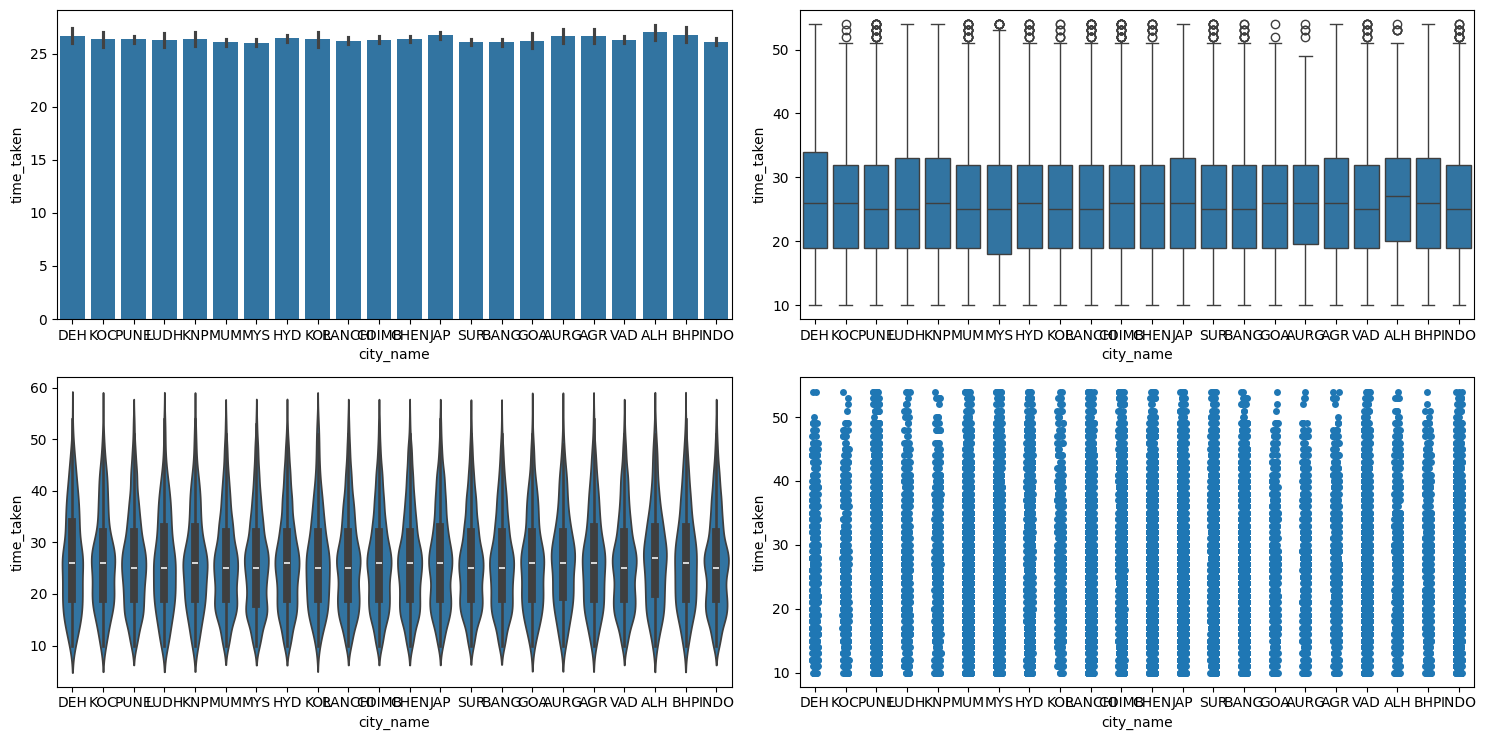

In [ ]:
# does a city affects delivery times

numerical_categorical_analysis(df_final, "city_name", "time_taken")

Count Percentage
city_type                      
Metropolitian  34023     76.81%
Urban          10108     22.82%
Semi-Urban       164      0.37%

**************************************************
The unique categories in city_type column are ['Metropolitian', 'Urban', 'Semi-Urban', nan]
**************************************************
The number of categories in city_type column are 3


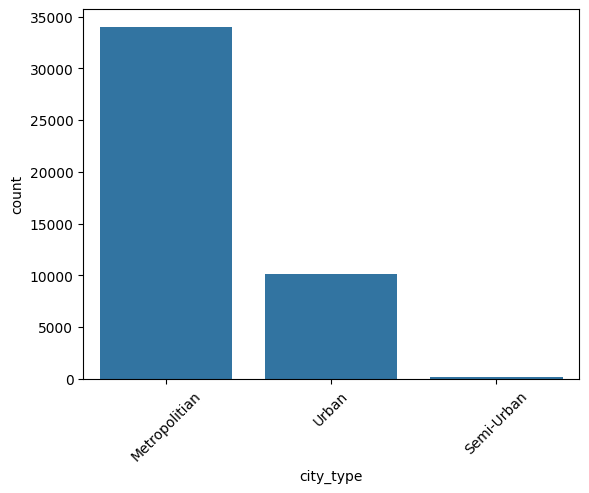

In [ ]:
# categorical analysis on city type

categorical_analysis(df_final, "city_type")

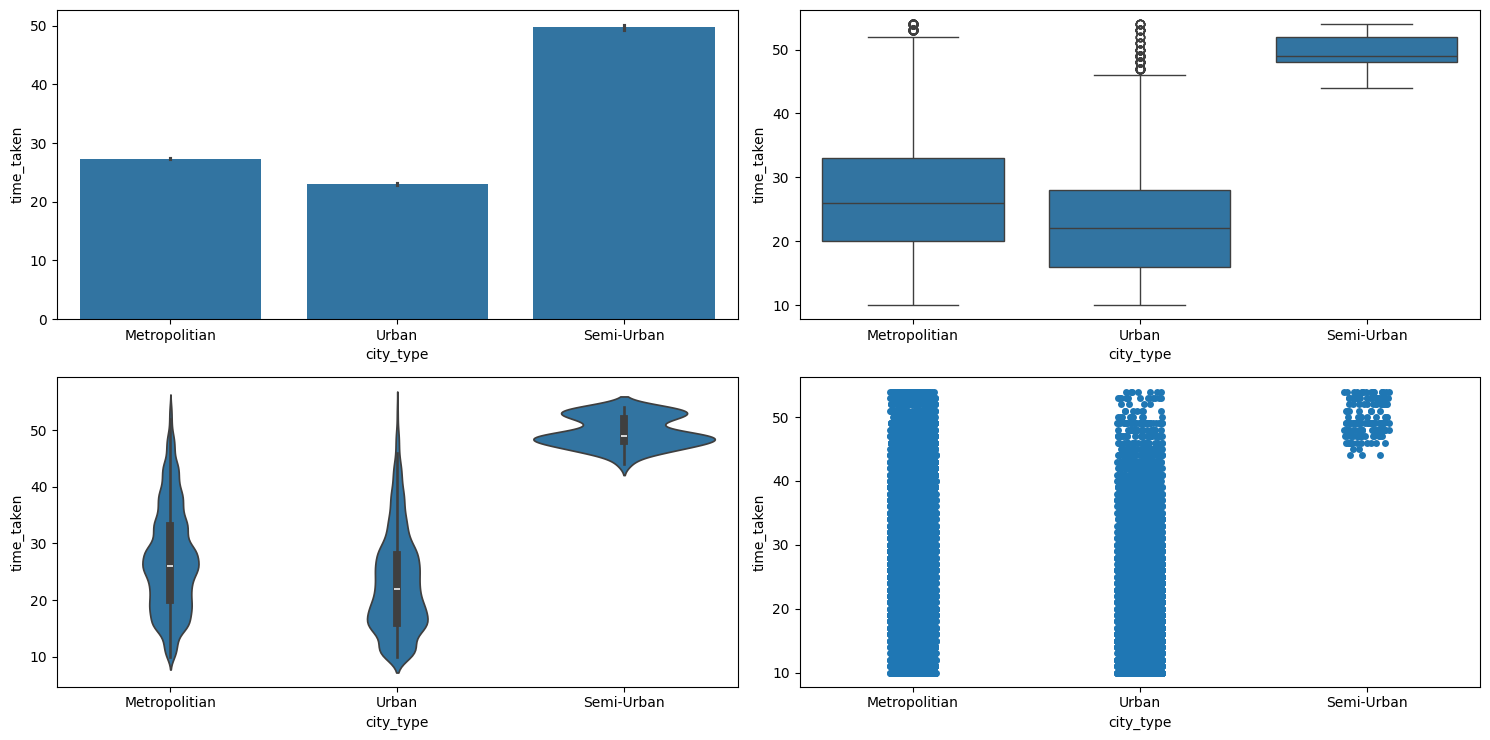

In [ ]:
# does city types affect delivery times

numerical_categorical_analysis(df_final, "city_type", "time_taken")

In [ ]:
# hypothesis test

anova_test(df_final, "time_taken", "city_type")

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and city_type.


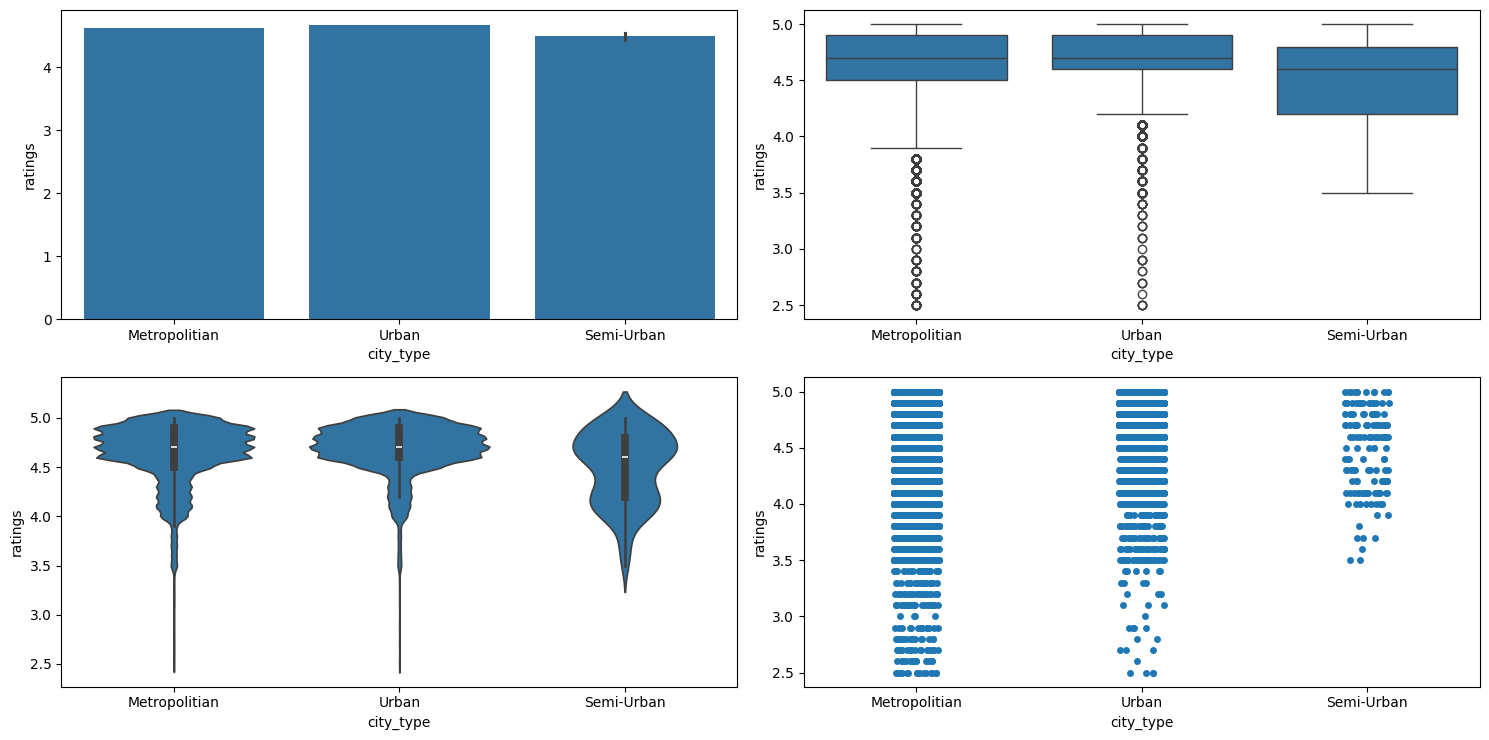

In [ ]:
# does city type affects rider ratings

numerical_categorical_analysis(df_final, "city_type", "ratings")

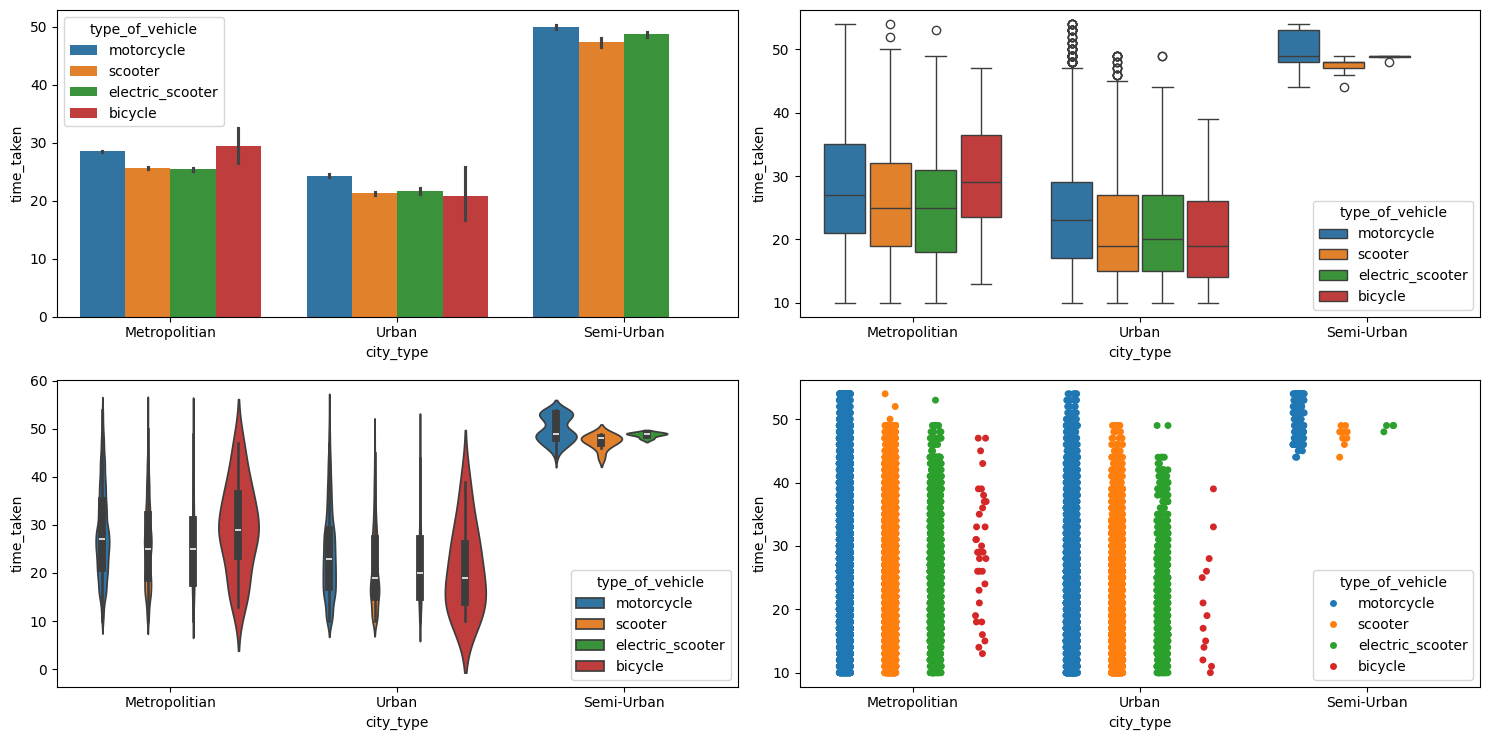

In [ ]:
# city type, type of vehicle and delivery time analysis

multivariate_analysis(df_final, "time_taken", "city_type", "type_of_vehicle")

### Distance

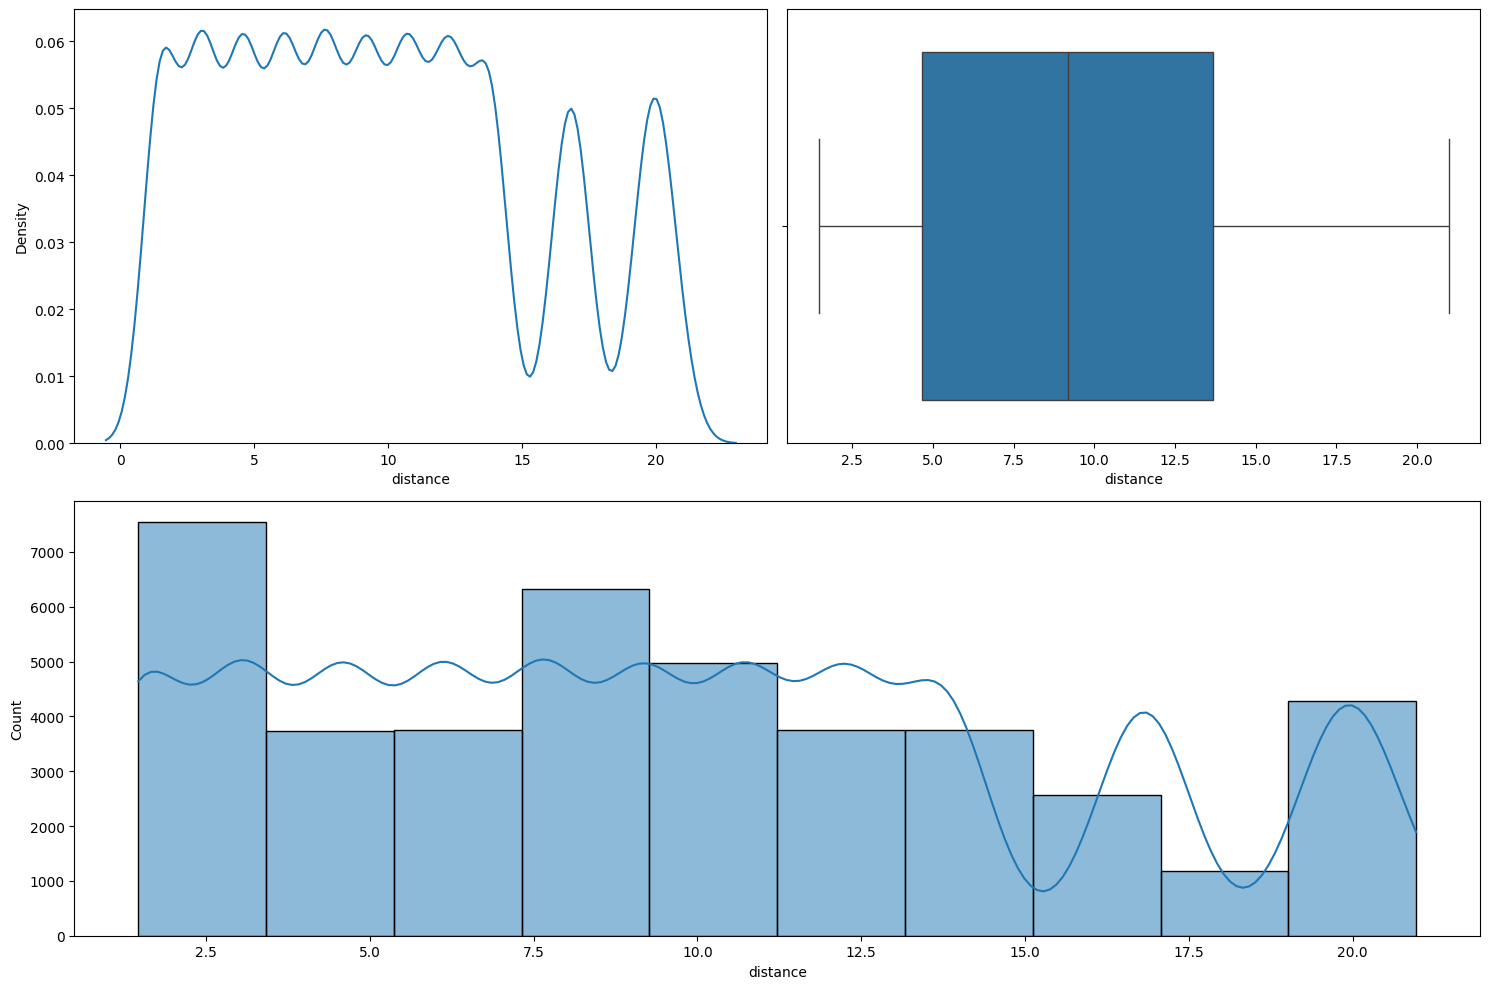

In [ ]:
# numerical analysis of distance

numerical_analysis(df_final, "distance",bins=10)

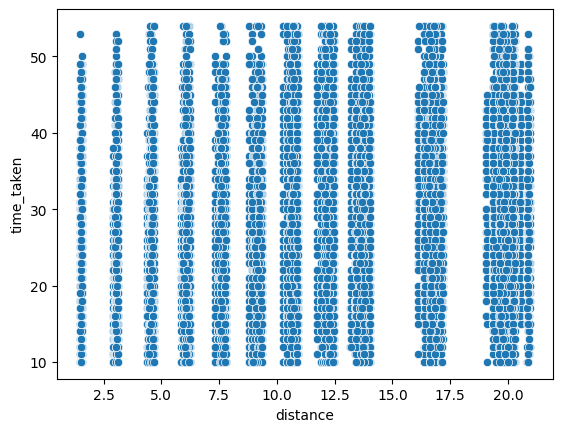

In [ ]:
# relationship between distance and delivery times

sns.scatterplot(df_final,x="distance",y="time_taken")
plt.show()

In [ ]:
# corr

df_final[["distance","time_taken"]].corr()

distance  time_taken
distance     1.00000     0.32064
time_taken   0.32064     1.00000

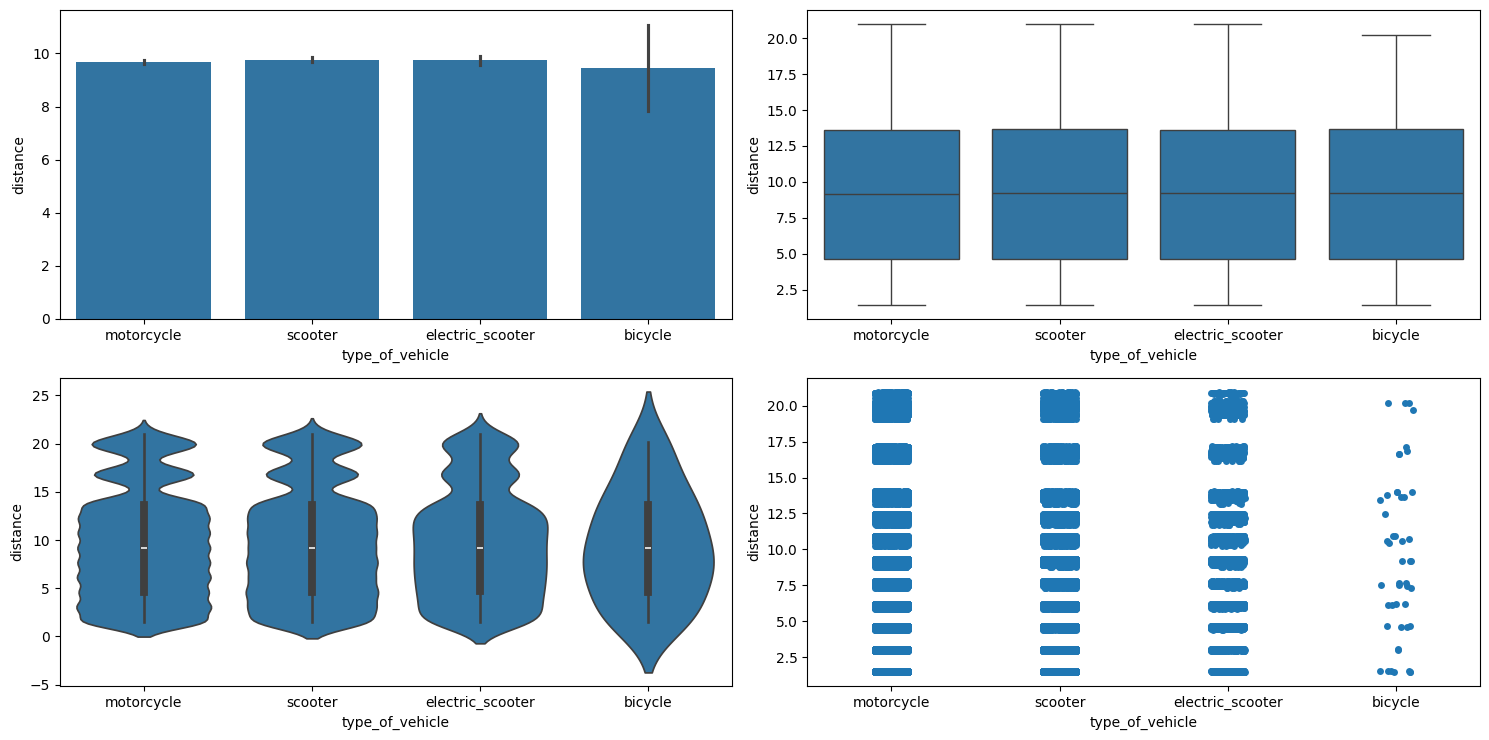

In [ ]:
# vehicle type and distance analysis

numerical_categorical_analysis(df_final, "type_of_vehicle", "distance")


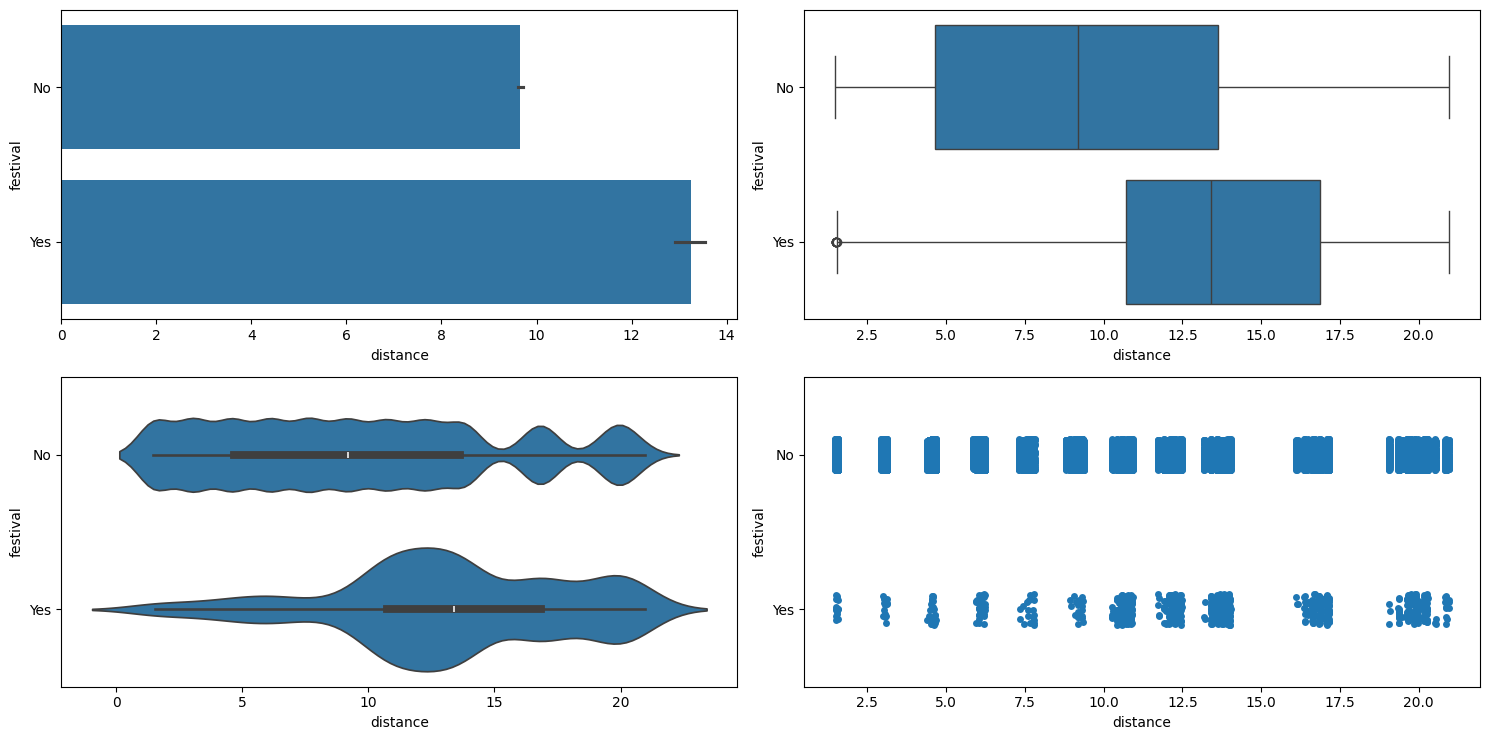

In [ ]:
# do riders cover more distances during festivals

numerical_categorical_analysis(df_final, "distance", "festival")

In [ ]:
# new feature based on distance

df_final = df_final.assign(
                        distance_type = pd.cut(df_final["distance"],bins=[0,5,10,15,25],
                                               right=False,labels=["short","medium","long","very_long"])
                                    )

In [ ]:
df_final

rider_id   age  ratings  restaurant_latitude  \
0         DEHRES17DEL01  36.0      4.2            30.327968   
1         KOCRES16DEL01  21.0      4.7            10.003064   
2        PUNERES13DEL03  23.0      4.7            18.562450   
3        LUDHRES15DEL02  34.0      4.3            30.899584   
4         KNPRES14DEL02  24.0      4.7            26.463504   
...                 ...   ...      ...                  ...   
45488     JAPRES04DEL01  30.0      4.8            26.902328   
45489     AGRRES16DEL01  21.0      4.6                  NaN   
45490    CHENRES08DEL03  30.0      4.9            13.022394   
45491   COIMBRES11DEL01  20.0      4.7            11.001753   
45492  RANCHIRES09DEL02  23.0      4.9            23.351058   

       restaurant_longitude  delivery_latitude  delivery_longitude  \
0                 78.046106          30.397968           78.116106   
1                 76.307589          10.043064           76.347589   
2                 73.916619          18.652450           74.006619   
3                 75.809346          30.919584           75.829346   
4                 80.372929          26.593504           80.502929   
...                     ...                ...                 ...   
45488             75.794257          26.912328           75.804257   
45489                   NaN                NaN                 NaN   
45490             80.242439          13.052394           80.272439   
45491             76.986241          11.041753           77.026241   
45492             85.325731          23.431058           85.405731   

       order_date     weather traffic  ...  city_name order_day order_month  \
0      2022-02-12         Fog     Jam  ...        DEH        12           2   
1      2022-02-13      Stormy    High  ...        KOC        13           2   
2      2022-03-04  Sandstorms  Medium  ...       PUNE         4           3   
3      2022-02-13  Sandstorms     Low  ...       LUDH        13           2   
4      2022-02-14         Fog     Jam  ...        KNP        14           2   
...           ...         ...     ...  ...        ...       ...         ...   
45488  2022-03-24       Windy    High  ...        JAP        24           3   
45489  2022-02-16       Windy     Jam  ...        AGR        16           2   
45490  2022-03-11      Cloudy     Low  ...       CHEN        11           3   
45491  2022-03-07      Cloudy    High  ...      COIMB         7           3   
45492  2022-03-02         Fog  Medium  ...     RANCHI         2           3   

       order_day_of_week is_weekend pickup_time_minutes  order_time_hour  \
0               saturday          1                15.0             21.0   
1                 sunday          1                10.0             14.0   
2                 friday          0                10.0             17.0   
3                 sunday          1                10.0              9.0   
4                 monday          0                15.0             19.0   
...                  ...        ...                 ...              ...   
45488           thursday          0                10.0             11.0   
45489          wednesday          0                15.0             19.0   
45490             friday          0                15.0             23.0   
45491             monday          0                 5.0             13.0   
45492          wednesday          0                 5.0             17.0   

      order_time_of_day   distance  distance_type  
0                 night  10.280582           long  
1             afternoon   6.242319         medium  
2               evening  13.787860           long  
3               morning   2.930258          short  
4               evening  19.396618      very_long  
...                 ...        ...            ...  
45488           morning   1.489846          short  
45489           evening        NaN            NaN  
45490             night   4.657195          short  
45491         afternoon   6.232393 